In [13]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.utils import check_random_state
from FFNN import FFNN


In [14]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

Sparsity with L1 penalty: 79.41%
Test score with L1 penalty: 0.8284
Example run in 6.232 s


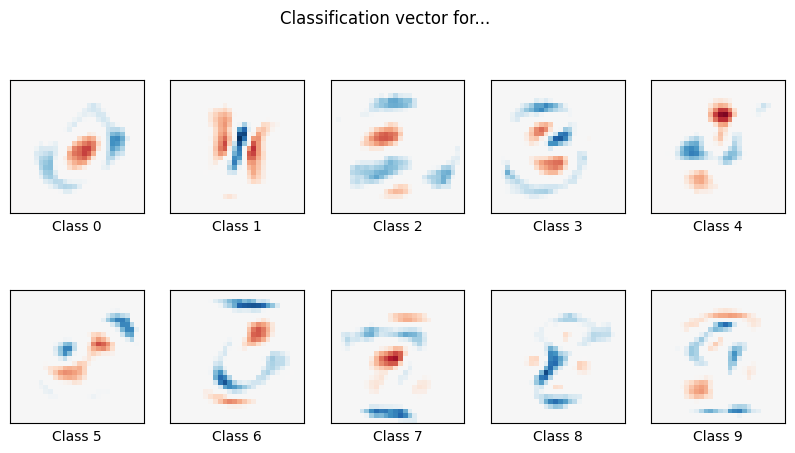

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

## Depth Variation

Epoch 1/20 - Train Loss: 1.8736 - Val Loss: 1.9039
Epoch 2/20 - Train Loss: 1.4837 - Val Loss: 1.5374
Epoch 3/20 - Train Loss: 1.1718 - Val Loss: 1.2316
Epoch 4/20 - Train Loss: 0.9602 - Val Loss: 1.0478
Epoch 5/20 - Train Loss: 0.8253 - Val Loss: 0.9340
Epoch 6/20 - Train Loss: 0.7390 - Val Loss: 0.8678
Epoch 7/20 - Train Loss: 0.6499 - Val Loss: 0.8078
Epoch 8/20 - Train Loss: 0.5840 - Val Loss: 0.7493
Epoch 9/20 - Train Loss: 0.5209 - Val Loss: 0.7100
Epoch 10/20 - Train Loss: 0.4805 - Val Loss: 0.6707
Epoch 11/20 - Train Loss: 0.4490 - Val Loss: 0.6579
Epoch 12/20 - Train Loss: 0.4079 - Val Loss: 0.6267
Epoch 13/20 - Train Loss: 0.4060 - Val Loss: 0.6505
Epoch 14/20 - Train Loss: 0.3622 - Val Loss: 0.5964
Epoch 15/20 - Train Loss: 0.3395 - Val Loss: 0.5942
Epoch 16/20 - Train Loss: 0.3234 - Val Loss: 0.5784
Epoch 17/20 - Train Loss: 0.3059 - Val Loss: 0.5699
Epoch 18/20 - Train Loss: 0.2948 - Val Loss: 0.5530
Epoch 19/20 - Train Loss: 0.2773 - Val Loss: 0.5576
Epoch 20/20 - Train L

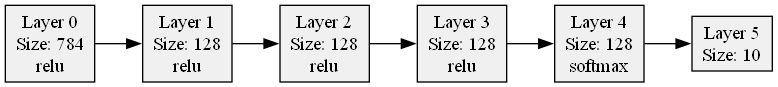

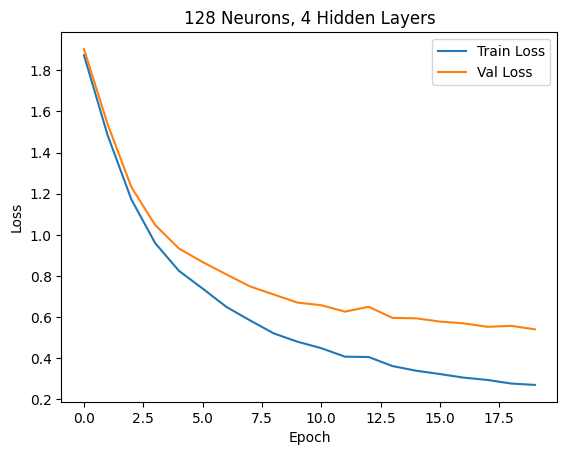

Epoch 1/20 - Train Loss: 1.7554 - Val Loss: 1.8487
Epoch 2/20 - Train Loss: 1.3693 - Val Loss: 1.4734
Epoch 3/20 - Train Loss: 1.1101 - Val Loss: 1.2077
Epoch 4/20 - Train Loss: 0.9339 - Val Loss: 1.0391
Epoch 5/20 - Train Loss: 0.8133 - Val Loss: 0.9301
Epoch 6/20 - Train Loss: 0.7207 - Val Loss: 0.8490
Epoch 7/20 - Train Loss: 0.6480 - Val Loss: 0.7832
Epoch 8/20 - Train Loss: 0.5889 - Val Loss: 0.7276
Epoch 9/20 - Train Loss: 0.5383 - Val Loss: 0.6794
Epoch 10/20 - Train Loss: 0.5010 - Val Loss: 0.6441
Epoch 11/20 - Train Loss: 0.4613 - Val Loss: 0.6150
Epoch 12/20 - Train Loss: 0.4286 - Val Loss: 0.5898
Epoch 13/20 - Train Loss: 0.4093 - Val Loss: 0.5778
Epoch 14/20 - Train Loss: 0.3857 - Val Loss: 0.5489
Epoch 15/20 - Train Loss: 0.3602 - Val Loss: 0.5343
Epoch 16/20 - Train Loss: 0.3444 - Val Loss: 0.5160
Epoch 17/20 - Train Loss: 0.3289 - Val Loss: 0.5115
Epoch 18/20 - Train Loss: 0.3103 - Val Loss: 0.4929
Epoch 19/20 - Train Loss: 0.2985 - Val Loss: 0.4954
Epoch 20/20 - Train L

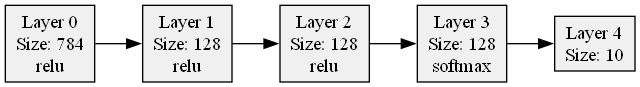

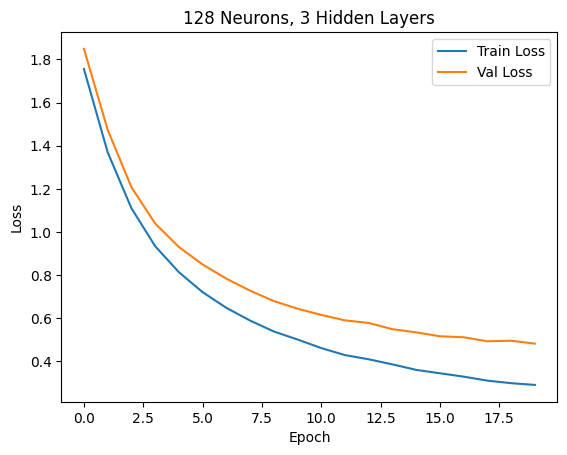

Epoch 1/20 - Train Loss: 1.7720 - Val Loss: 1.8140
Epoch 2/20 - Train Loss: 1.3047 - Val Loss: 1.3724
Epoch 3/20 - Train Loss: 1.0512 - Val Loss: 1.1225
Epoch 4/20 - Train Loss: 0.8947 - Val Loss: 0.9676
Epoch 5/20 - Train Loss: 0.7876 - Val Loss: 0.8639
Epoch 6/20 - Train Loss: 0.7081 - Val Loss: 0.7971
Epoch 7/20 - Train Loss: 0.6446 - Val Loss: 0.7396
Epoch 8/20 - Train Loss: 0.5910 - Val Loss: 0.6914
Epoch 9/20 - Train Loss: 0.5502 - Val Loss: 0.6580
Epoch 10/20 - Train Loss: 0.5173 - Val Loss: 0.6268
Epoch 11/20 - Train Loss: 0.4816 - Val Loss: 0.5999
Epoch 12/20 - Train Loss: 0.4532 - Val Loss: 0.5745
Epoch 13/20 - Train Loss: 0.4321 - Val Loss: 0.5587
Epoch 14/20 - Train Loss: 0.4100 - Val Loss: 0.5401
Epoch 15/20 - Train Loss: 0.3910 - Val Loss: 0.5246
Epoch 16/20 - Train Loss: 0.3753 - Val Loss: 0.5104
Epoch 17/20 - Train Loss: 0.3592 - Val Loss: 0.4967
Epoch 18/20 - Train Loss: 0.3459 - Val Loss: 0.4867
Epoch 19/20 - Train Loss: 0.3328 - Val Loss: 0.4798
Epoch 20/20 - Train L

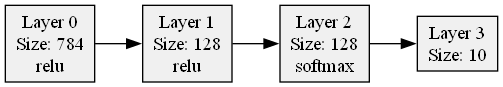

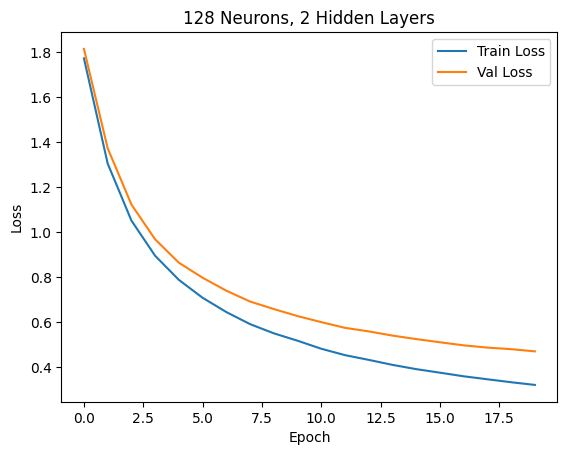


================= Hasil Perbandingan =================
TC 1 Accuracy: 85.74% | Waktu: 5.58s
TC 2 Accuracy: 86.14% | Waktu: 5.79s
TC 3 Accuracy: 86.32% | Waktu: 4.39s


In [18]:
## Variasi depth FFNN
# 4 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0

# 3 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 3 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc2_accuracy = np.mean(test_pred_classes == y_test_int)
tc2_time = time.time() - t0

# 2 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 2 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc3_accuracy = np.mean(test_pred_classes == y_test_int)
tc3_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"TC 1 Accuracy: {tc1_accuracy * 100:.2f}% | Waktu: {tc1_time:.2f}s")
print(f"TC 2 Accuracy: {tc2_accuracy * 100:.2f}% | Waktu: {tc2_time:.2f}s")
print(f"TC 3 Accuracy: {tc3_accuracy * 100:.2f}% | Waktu: {tc3_time:.2f}s")
print("=======================================================")

## Width Variation

Epoch 1/20 - Train Loss: 1.8736 - Val Loss: 1.9039
Epoch 2/20 - Train Loss: 1.4837 - Val Loss: 1.5374
Epoch 3/20 - Train Loss: 1.1718 - Val Loss: 1.2316
Epoch 4/20 - Train Loss: 0.9602 - Val Loss: 1.0478
Epoch 5/20 - Train Loss: 0.8253 - Val Loss: 0.9340
Epoch 6/20 - Train Loss: 0.7390 - Val Loss: 0.8678
Epoch 7/20 - Train Loss: 0.6499 - Val Loss: 0.8078
Epoch 8/20 - Train Loss: 0.5840 - Val Loss: 0.7493
Epoch 9/20 - Train Loss: 0.5209 - Val Loss: 0.7100
Epoch 10/20 - Train Loss: 0.4805 - Val Loss: 0.6707
Epoch 11/20 - Train Loss: 0.4490 - Val Loss: 0.6579
Epoch 12/20 - Train Loss: 0.4079 - Val Loss: 0.6267
Epoch 13/20 - Train Loss: 0.4060 - Val Loss: 0.6505
Epoch 14/20 - Train Loss: 0.3622 - Val Loss: 0.5964
Epoch 15/20 - Train Loss: 0.3395 - Val Loss: 0.5942
Epoch 16/20 - Train Loss: 0.3234 - Val Loss: 0.5784
Epoch 17/20 - Train Loss: 0.3059 - Val Loss: 0.5699
Epoch 18/20 - Train Loss: 0.2948 - Val Loss: 0.5530
Epoch 19/20 - Train Loss: 0.2773 - Val Loss: 0.5576
Epoch 20/20 - Train L

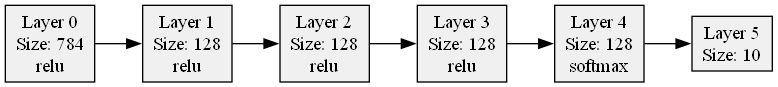

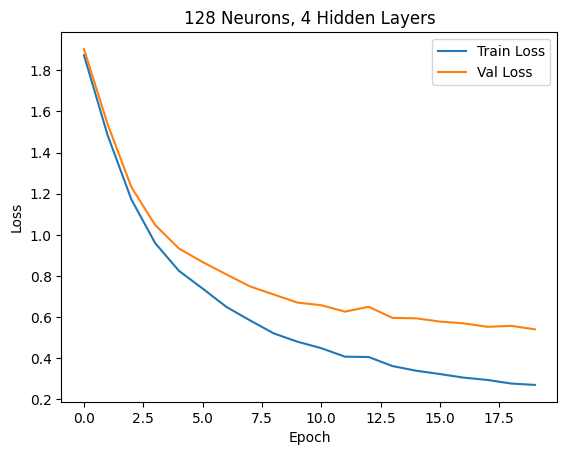

Epoch 1/20 - Train Loss: 2.2954 - Val Loss: 2.2915
Epoch 2/20 - Train Loss: 2.2495 - Val Loss: 2.2438
Epoch 3/20 - Train Loss: 2.1958 - Val Loss: 2.1890
Epoch 4/20 - Train Loss: 2.1247 - Val Loss: 2.1177
Epoch 5/20 - Train Loss: 2.0298 - Val Loss: 2.0239
Epoch 6/20 - Train Loss: 1.9097 - Val Loss: 1.9059
Epoch 7/20 - Train Loss: 1.7661 - Val Loss: 1.7666
Epoch 8/20 - Train Loss: 1.6087 - Val Loss: 1.6125
Epoch 9/20 - Train Loss: 1.4590 - Val Loss: 1.4637
Epoch 10/20 - Train Loss: 1.3244 - Val Loss: 1.3284
Epoch 11/20 - Train Loss: 1.2068 - Val Loss: 1.2110
Epoch 12/20 - Train Loss: 1.1036 - Val Loss: 1.1117
Epoch 13/20 - Train Loss: 1.0148 - Val Loss: 1.0199
Epoch 14/20 - Train Loss: 0.9349 - Val Loss: 0.9524
Epoch 15/20 - Train Loss: 0.8581 - Val Loss: 0.8749
Epoch 16/20 - Train Loss: 0.7958 - Val Loss: 0.8204
Epoch 17/20 - Train Loss: 0.7367 - Val Loss: 0.7660
Epoch 18/20 - Train Loss: 0.6894 - Val Loss: 0.7248
Epoch 19/20 - Train Loss: 0.6457 - Val Loss: 0.6851
Epoch 20/20 - Train L

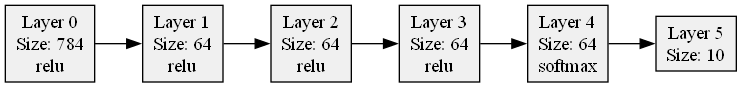

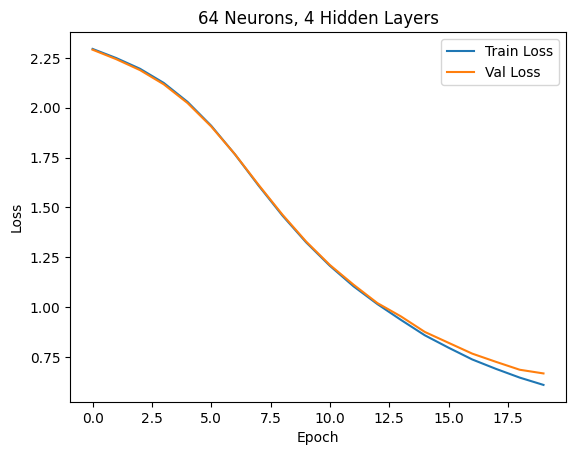

Epoch 1/20 - Train Loss: 2.3007 - Val Loss: 2.3027
Epoch 2/20 - Train Loss: 2.2973 - Val Loss: 2.2995
Epoch 3/20 - Train Loss: 2.2940 - Val Loss: 2.2964
Epoch 4/20 - Train Loss: 2.2905 - Val Loss: 2.2930
Epoch 5/20 - Train Loss: 2.2866 - Val Loss: 2.2894
Epoch 6/20 - Train Loss: 2.2823 - Val Loss: 2.2853
Epoch 7/20 - Train Loss: 2.2774 - Val Loss: 2.2807
Epoch 8/20 - Train Loss: 2.2718 - Val Loss: 2.2753
Epoch 9/20 - Train Loss: 2.2652 - Val Loss: 2.2689
Epoch 10/20 - Train Loss: 2.2574 - Val Loss: 2.2612
Epoch 11/20 - Train Loss: 2.2479 - Val Loss: 2.2518
Epoch 12/20 - Train Loss: 2.2361 - Val Loss: 2.2401
Epoch 13/20 - Train Loss: 2.2214 - Val Loss: 2.2257
Epoch 14/20 - Train Loss: 2.2032 - Val Loss: 2.2076
Epoch 15/20 - Train Loss: 2.1795 - Val Loss: 2.1840
Epoch 16/20 - Train Loss: 2.1501 - Val Loss: 2.1547
Epoch 17/20 - Train Loss: 2.1128 - Val Loss: 2.1175
Epoch 18/20 - Train Loss: 2.0681 - Val Loss: 2.0736
Epoch 19/20 - Train Loss: 2.0138 - Val Loss: 2.0195
Epoch 20/20 - Train L

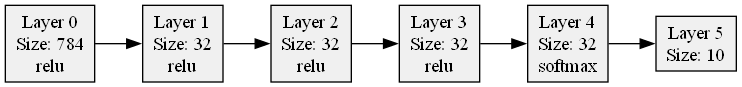

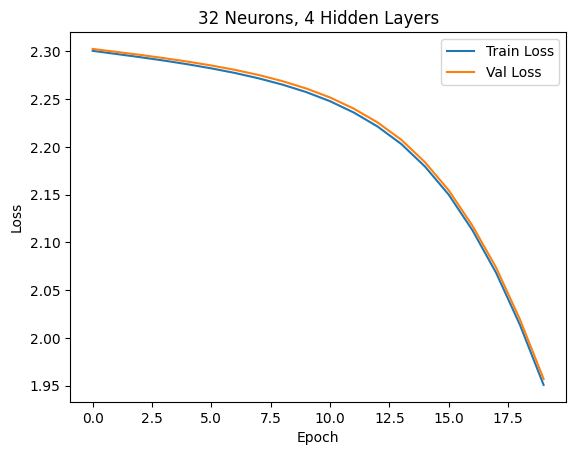


================= Hasil Perbandingan =================
TC 1 Accuracy: 85.74% | Waktu: 5.64s
TC 2 Accuracy: 80.23% | Waktu: 4.25s
TC 3 Accuracy: 38.48% | Waktu: 2.20s


In [19]:
## Variasi width FFNN
# 128 neuron
# ==============================
layer_sizes = [784, 128, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0

# 64 neuron
# ==============================
layer_sizes = [784, 64, 64, 64, 64, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('64 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc2_accuracy = np.mean(test_pred_classes == y_test_int)
tc2_time = time.time() - t0

# 32 neuron
# ==============================
layer_sizes = [784, 32, 32, 32, 32, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('32 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc3_accuracy = np.mean(test_pred_classes == y_test_int)
tc3_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"TC 1 Accuracy: {tc1_accuracy * 100:.2f}% | Waktu: {tc1_time:.2f}s")
print(f"TC 2 Accuracy: {tc2_accuracy * 100:.2f}% | Waktu: {tc2_time:.2f}s")
print(f"TC 3 Accuracy: {tc3_accuracy * 100:.2f}% | Waktu: {tc3_time:.2f}s")
print("=======================================================")

## Activation Function Variation

Epoch 1/20 - Train Loss: 1.9259 - Val Loss: 1.9453
Epoch 2/20 - Train Loss: 1.5400 - Val Loss: 1.5844
Epoch 3/20 - Train Loss: 1.2646 - Val Loss: 1.3306
Epoch 4/20 - Train Loss: 1.0750 - Val Loss: 1.1516
Epoch 5/20 - Train Loss: 0.9364 - Val Loss: 1.0251
Epoch 6/20 - Train Loss: 0.8343 - Val Loss: 0.9358
Epoch 7/20 - Train Loss: 0.7532 - Val Loss: 0.8636
Epoch 8/20 - Train Loss: 0.6900 - Val Loss: 0.8067
Epoch 9/20 - Train Loss: 0.6339 - Val Loss: 0.7639
Epoch 10/20 - Train Loss: 0.5882 - Val Loss: 0.7214
Epoch 11/20 - Train Loss: 0.5506 - Val Loss: 0.6947
Epoch 12/20 - Train Loss: 0.5165 - Val Loss: 0.6622
Epoch 13/20 - Train Loss: 0.4883 - Val Loss: 0.6373
Epoch 14/20 - Train Loss: 0.4626 - Val Loss: 0.6230
Epoch 15/20 - Train Loss: 0.4403 - Val Loss: 0.6034
Epoch 16/20 - Train Loss: 0.4208 - Val Loss: 0.5849
Epoch 17/20 - Train Loss: 0.4020 - Val Loss: 0.5745
Epoch 18/20 - Train Loss: 0.3863 - Val Loss: 0.5612
Epoch 19/20 - Train Loss: 0.3722 - Val Loss: 0.5534
Epoch 20/20 - Train L

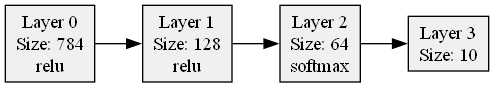

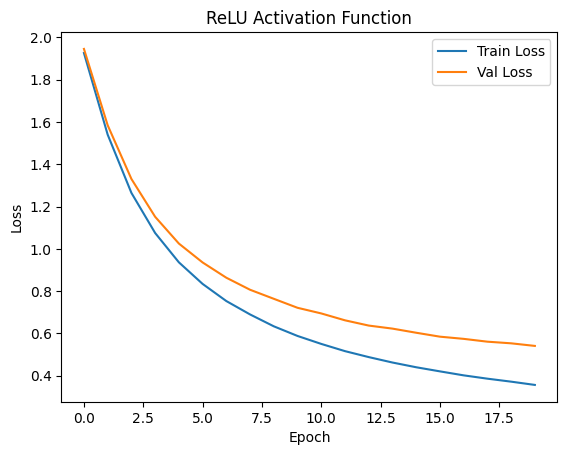

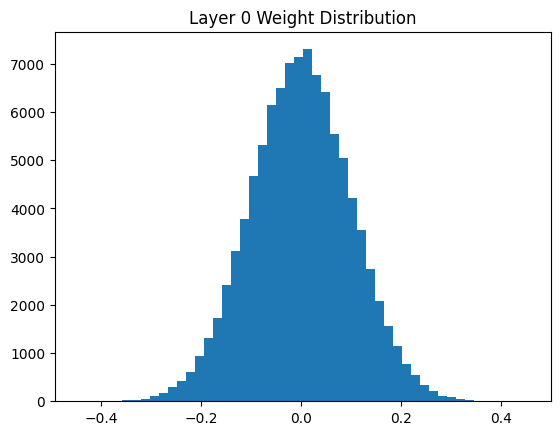

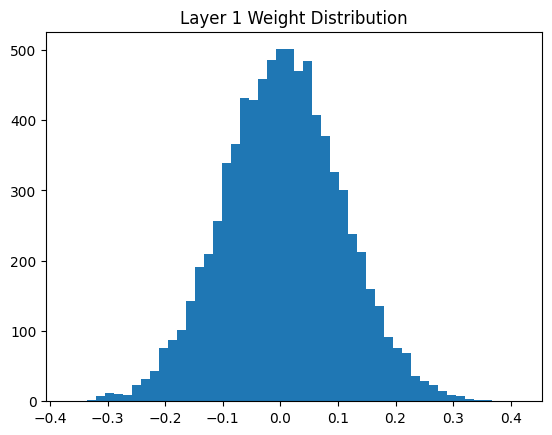

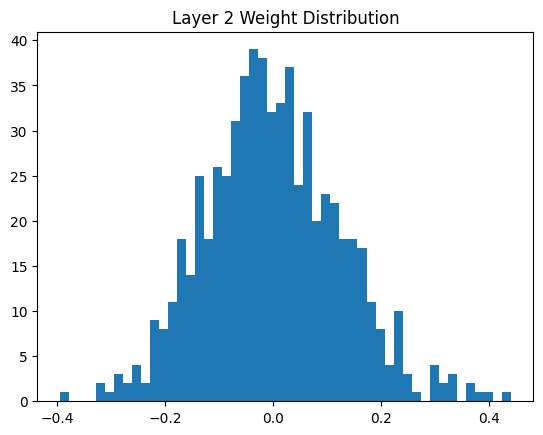

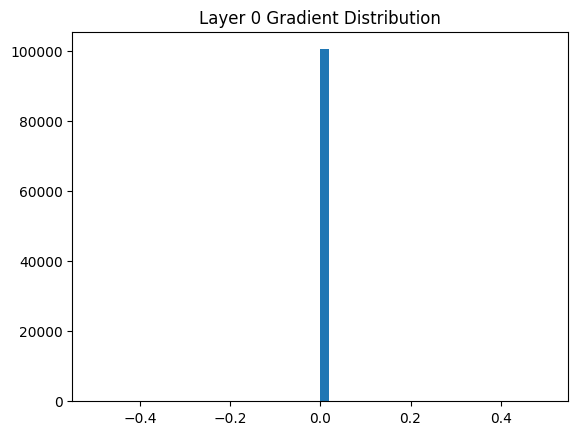

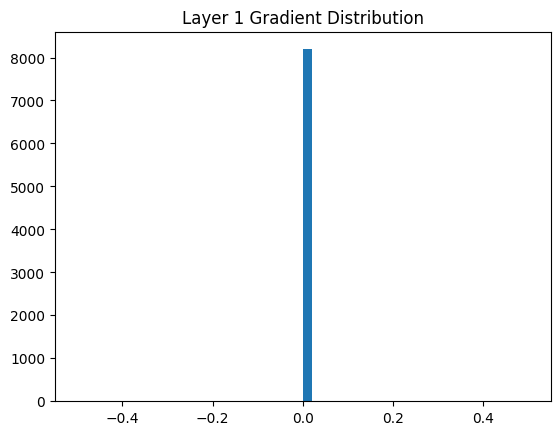

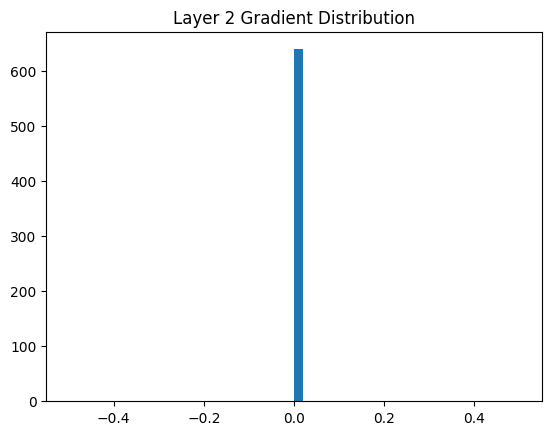

Epoch 1/20 - Train Loss: 2.3016 - Val Loss: 2.2947
Epoch 2/20 - Train Loss: 2.2853 - Val Loss: 2.2812
Epoch 3/20 - Train Loss: 2.2751 - Val Loss: 2.2730
Epoch 4/20 - Train Loss: 2.2668 - Val Loss: 2.2655
Epoch 5/20 - Train Loss: 2.2587 - Val Loss: 2.2579
Epoch 6/20 - Train Loss: 2.2505 - Val Loss: 2.2511
Epoch 7/20 - Train Loss: 2.2424 - Val Loss: 2.2428
Epoch 8/20 - Train Loss: 2.2342 - Val Loss: 2.2355
Epoch 9/20 - Train Loss: 2.2260 - Val Loss: 2.2279
Epoch 10/20 - Train Loss: 2.2175 - Val Loss: 2.2194
Epoch 11/20 - Train Loss: 2.2088 - Val Loss: 2.2108
Epoch 12/20 - Train Loss: 2.2000 - Val Loss: 2.2025
Epoch 13/20 - Train Loss: 2.1910 - Val Loss: 2.1928
Epoch 14/20 - Train Loss: 2.1817 - Val Loss: 2.1847
Epoch 15/20 - Train Loss: 2.1722 - Val Loss: 2.1751
Epoch 16/20 - Train Loss: 2.1625 - Val Loss: 2.1654
Epoch 17/20 - Train Loss: 2.1525 - Val Loss: 2.1554
Epoch 18/20 - Train Loss: 2.1423 - Val Loss: 2.1456
Epoch 19/20 - Train Loss: 2.1317 - Val Loss: 2.1356
Epoch 20/20 - Train L

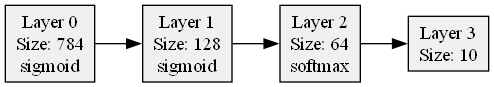

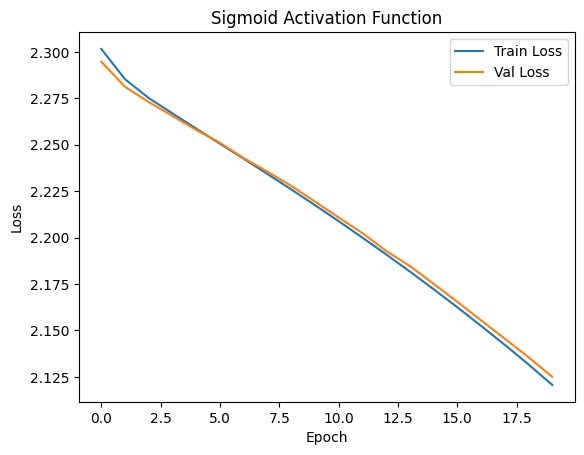

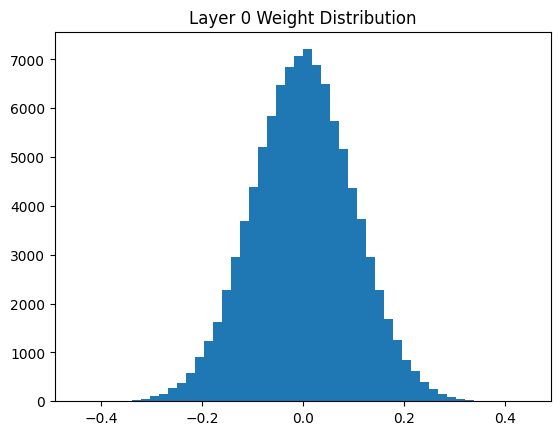

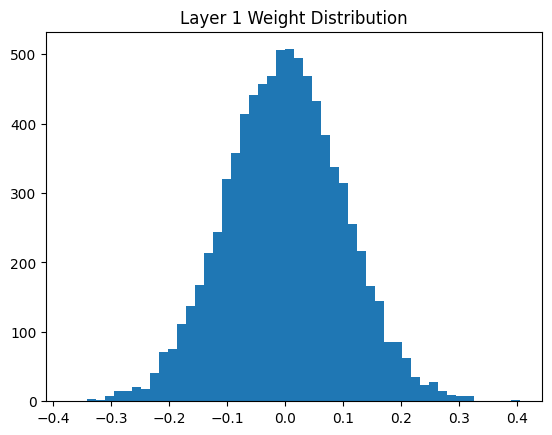

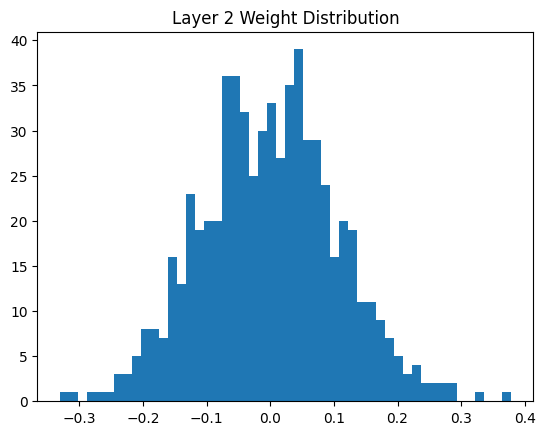

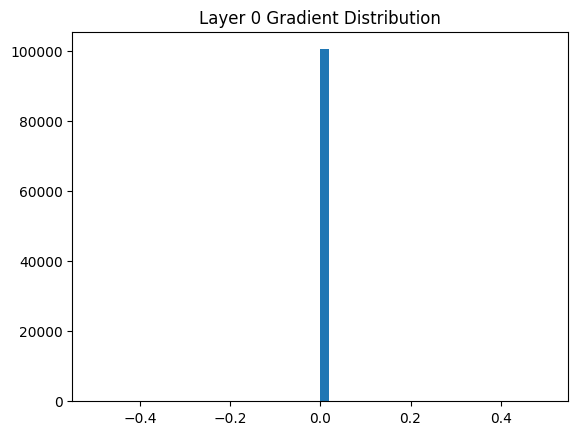

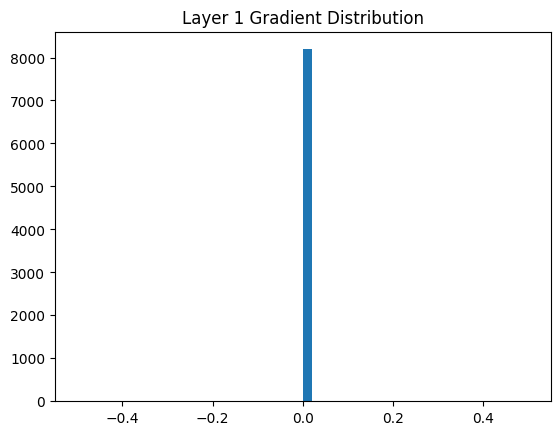

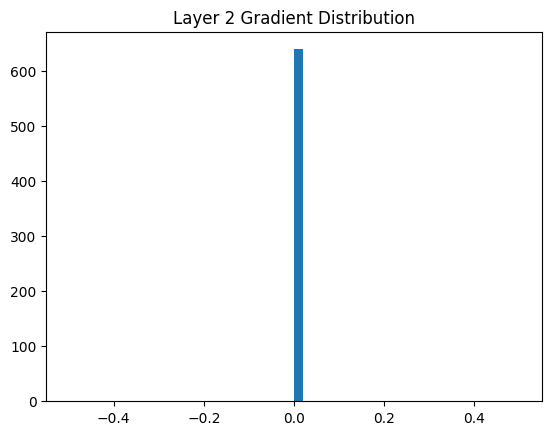

Epoch 1/20 - Train Loss: 1.5716 - Val Loss: 1.6255
Epoch 2/20 - Train Loss: 1.1696 - Val Loss: 1.2658
Epoch 3/20 - Train Loss: 0.9941 - Val Loss: 1.1085
Epoch 4/20 - Train Loss: 0.8915 - Val Loss: 1.0159
Epoch 5/20 - Train Loss: 0.8205 - Val Loss: 0.9526
Epoch 6/20 - Train Loss: 0.7687 - Val Loss: 0.9086
Epoch 7/20 - Train Loss: 0.7283 - Val Loss: 0.8718
Epoch 8/20 - Train Loss: 0.6955 - Val Loss: 0.8407
Epoch 9/20 - Train Loss: 0.6677 - Val Loss: 0.8188
Epoch 10/20 - Train Loss: 0.6444 - Val Loss: 0.7976
Epoch 11/20 - Train Loss: 0.6238 - Val Loss: 0.7794
Epoch 12/20 - Train Loss: 0.6056 - Val Loss: 0.7633
Epoch 13/20 - Train Loss: 0.5898 - Val Loss: 0.7475
Epoch 14/20 - Train Loss: 0.5755 - Val Loss: 0.7356
Epoch 15/20 - Train Loss: 0.5624 - Val Loss: 0.7245
Epoch 16/20 - Train Loss: 0.5505 - Val Loss: 0.7126
Epoch 17/20 - Train Loss: 0.5397 - Val Loss: 0.7028
Epoch 18/20 - Train Loss: 0.5304 - Val Loss: 0.6936
Epoch 19/20 - Train Loss: 0.5212 - Val Loss: 0.6829
Epoch 20/20 - Train L

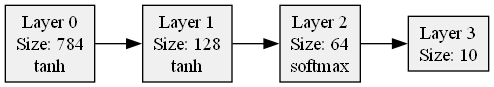

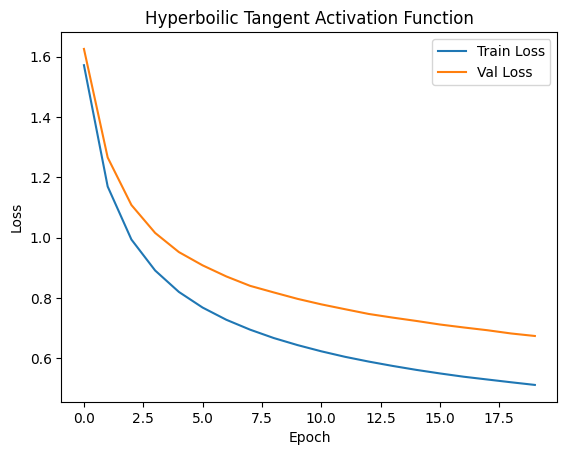

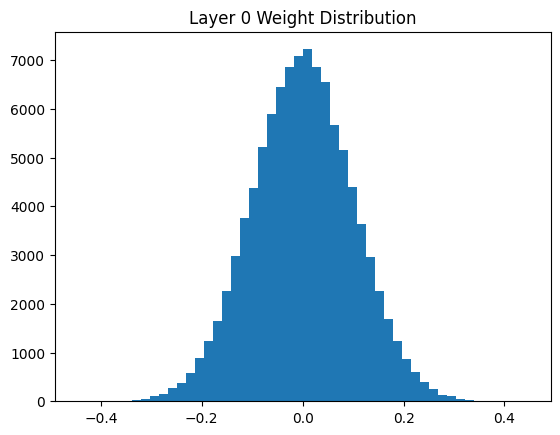

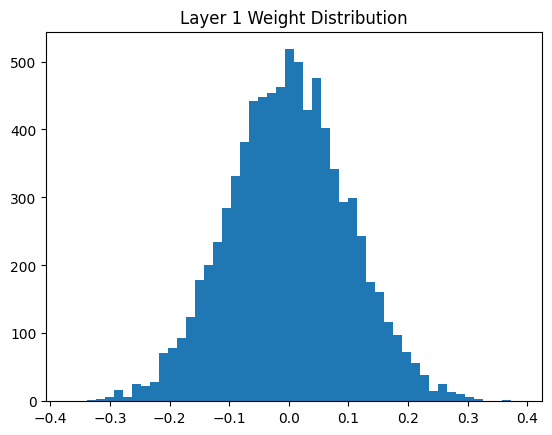

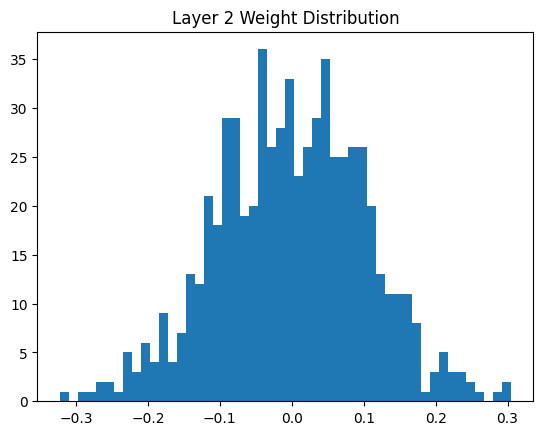

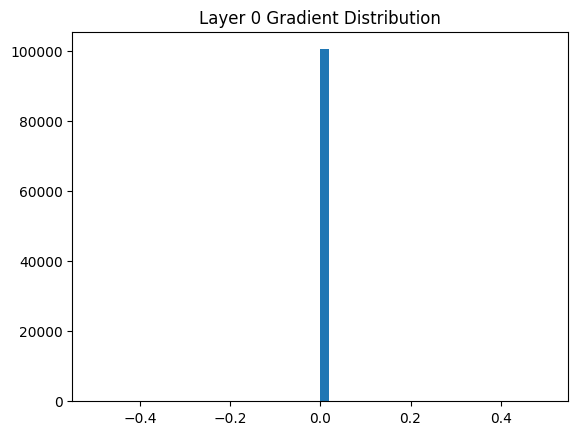

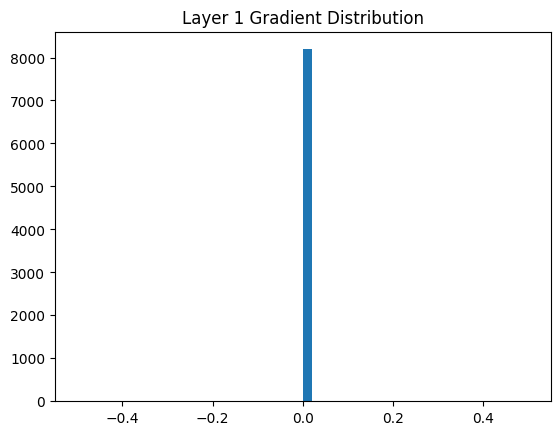

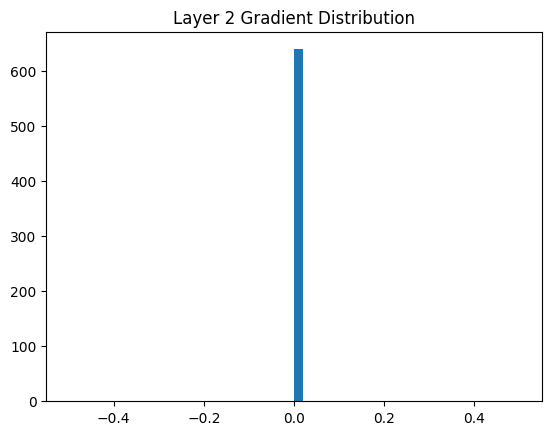

Epoch 1/20 - Train Loss: 1.1230 - Val Loss: 1.2348
Epoch 2/20 - Train Loss: 0.8120 - Val Loss: 0.9714
Epoch 3/20 - Train Loss: 0.6721 - Val Loss: 0.8517
Epoch 4/20 - Train Loss: 0.5899 - Val Loss: 0.7818
Epoch 5/20 - Train Loss: 0.5334 - Val Loss: 0.7325
Epoch 6/20 - Train Loss: 0.4923 - Val Loss: 0.6989
Epoch 7/20 - Train Loss: 0.4604 - Val Loss: 0.6681
Epoch 8/20 - Train Loss: 0.4348 - Val Loss: 0.6444
Epoch 9/20 - Train Loss: 0.4140 - Val Loss: 0.6299
Epoch 10/20 - Train Loss: 0.3972 - Val Loss: 0.6158
Epoch 11/20 - Train Loss: 0.3807 - Val Loss: 0.6002
Epoch 12/20 - Train Loss: 0.3666 - Val Loss: 0.5892
Epoch 13/20 - Train Loss: 0.3550 - Val Loss: 0.5794
Epoch 14/20 - Train Loss: 0.3443 - Val Loss: 0.5731
Epoch 15/20 - Train Loss: 0.3346 - Val Loss: 0.5663
Epoch 16/20 - Train Loss: 0.3263 - Val Loss: 0.5593
Epoch 17/20 - Train Loss: 0.3185 - Val Loss: 0.5535
Epoch 18/20 - Train Loss: 0.3125 - Val Loss: 0.5491
Epoch 19/20 - Train Loss: 0.3053 - Val Loss: 0.5464
Epoch 20/20 - Train L

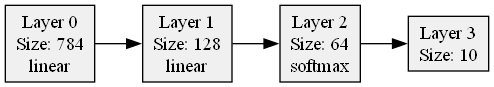

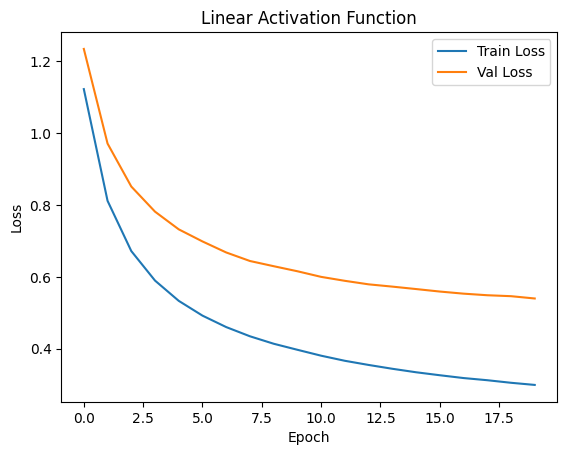

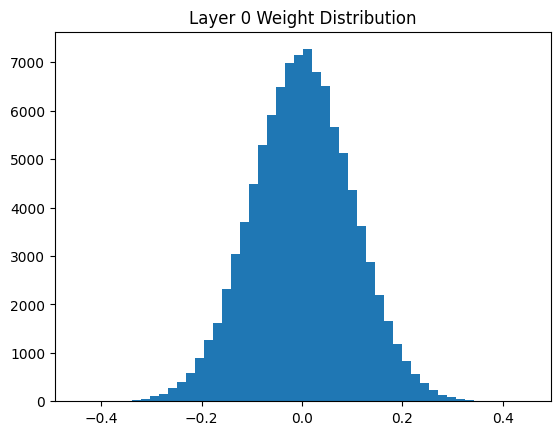

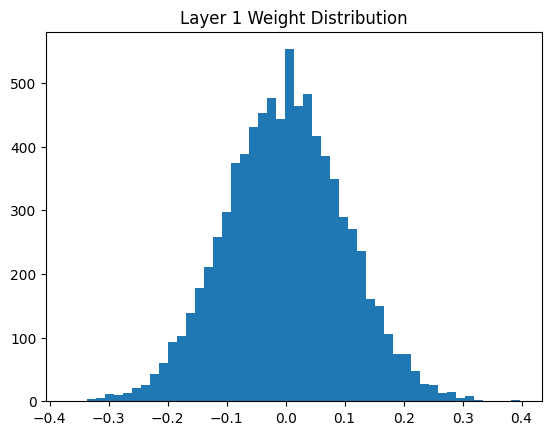

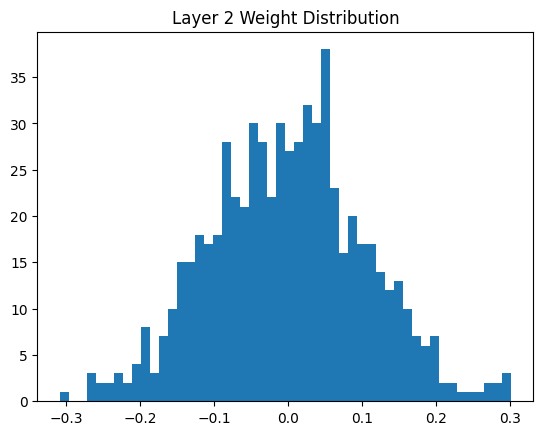

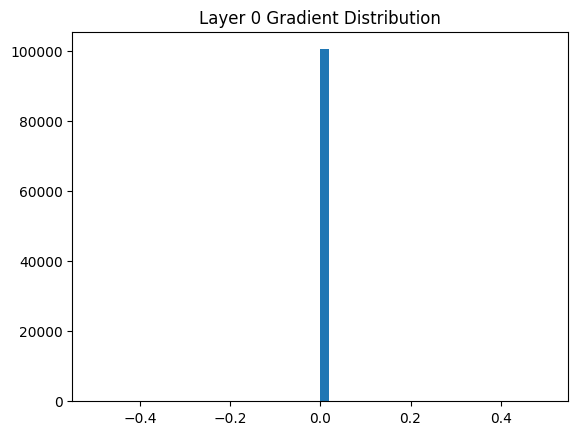

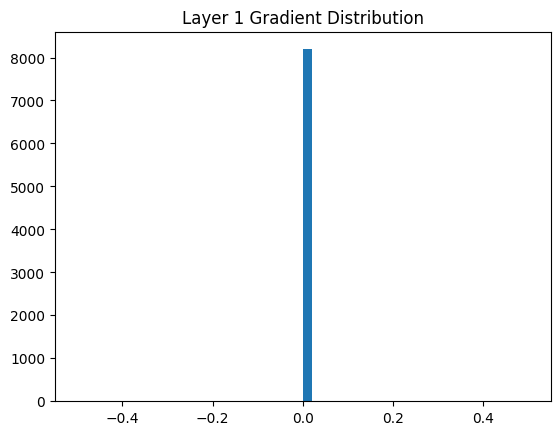

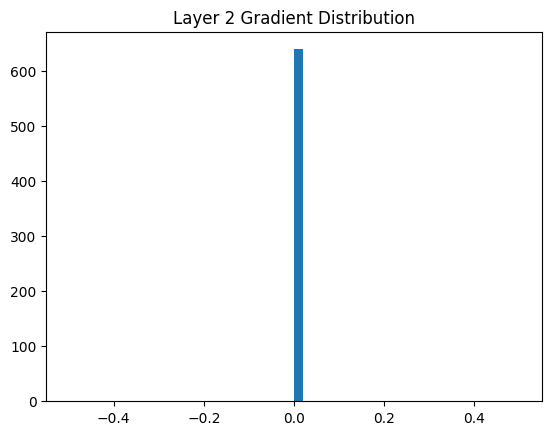


================= Hasil Perbandingan =================
ReLU accuracy: 85.77% | Waktu: 5.65s
Sigmoid accuracy: 42.58% | Waktu: 3.91s
tanh accuracy: 83.43% | Waktu: 3.15s
Linear accuracy: 87.31% | Waktu: 3.29s


In [20]:
## Variasi activation FFNN

# 1. ReLU
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('ReLU Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
ReLU_accuracy = np.mean(test_pred_classes == y_test_int)
ReLU_time = time.time() - t0


# 2. Sigmoid
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['sigmoid', 'sigmoid', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Sigmoid Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
sigmoid_accuracy = np.mean(test_pred_classes == y_test_int)
sigmoid_time = time.time() - t0


# 3. Tanh
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['tanh', 'tanh', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Hyperboilic Tangent Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tanh_accuracy = np.mean(test_pred_classes == y_test_int)
tanh_time = time.time() - t0


# 4. Linear
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['linear', 'linear', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()


plt.title('Linear Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
linear_accuracy = np.mean(test_pred_classes == y_test_int)
linear_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"ReLU accuracy: {ReLU_accuracy * 100:.2f}% | Waktu: {ReLU_time:.2f}s")
print(f"Sigmoid accuracy: {sigmoid_accuracy * 100:.2f}% | Waktu: {sigmoid_time:.2f}s")
print(f"tanh accuracy: {tanh_accuracy * 100:.2f}% | Waktu: {tanh_time:.2f}s")
print(f"Linear accuracy: {linear_accuracy * 100:.2f}% | Waktu: {linear_time:.2f}s")
print("=======================================================")

## Learning Rate Variation

Epoch 1/20 - Train Loss: 2.5181 - Val Loss: 2.5265
Epoch 2/20 - Train Loss: 2.4104 - Val Loss: 2.4193
Epoch 3/20 - Train Loss: 2.3240 - Val Loss: 2.3342
Epoch 4/20 - Train Loss: 2.2505 - Val Loss: 2.2617
Epoch 5/20 - Train Loss: 2.1856 - Val Loss: 2.1982
Epoch 6/20 - Train Loss: 2.1259 - Val Loss: 2.1406
Epoch 7/20 - Train Loss: 2.0708 - Val Loss: 2.0873
Epoch 8/20 - Train Loss: 2.0193 - Val Loss: 2.0375
Epoch 9/20 - Train Loss: 1.9703 - Val Loss: 1.9907
Epoch 10/20 - Train Loss: 1.9231 - Val Loss: 1.9459
Epoch 11/20 - Train Loss: 1.8782 - Val Loss: 1.9031
Epoch 12/20 - Train Loss: 1.8349 - Val Loss: 1.8621
Epoch 13/20 - Train Loss: 1.7932 - Val Loss: 1.8225
Epoch 14/20 - Train Loss: 1.7529 - Val Loss: 1.7849
Epoch 15/20 - Train Loss: 1.7141 - Val Loss: 1.7483
Epoch 16/20 - Train Loss: 1.6764 - Val Loss: 1.7128
Epoch 17/20 - Train Loss: 1.6401 - Val Loss: 1.6787
Epoch 18/20 - Train Loss: 1.6047 - Val Loss: 1.6458
Epoch 19/20 - Train Loss: 1.5704 - Val Loss: 1.6143
Epoch 20/20 - Train L

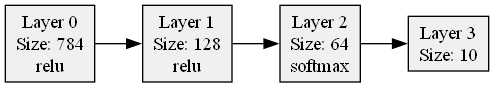

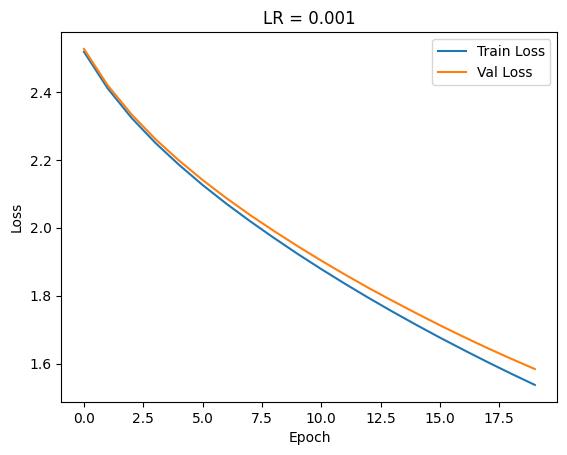

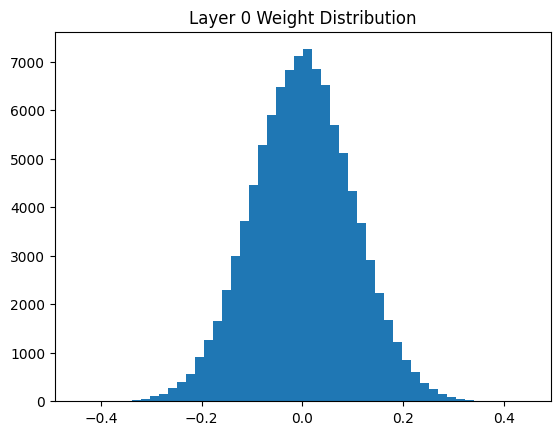

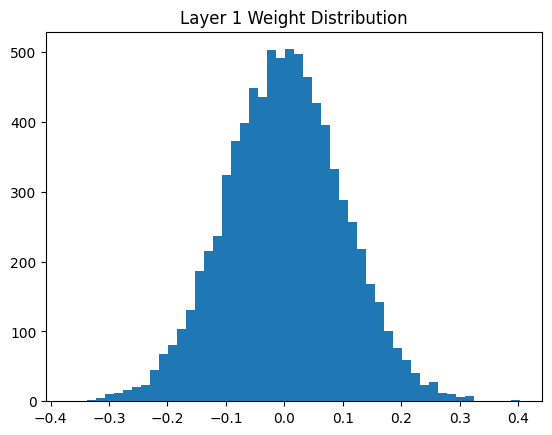

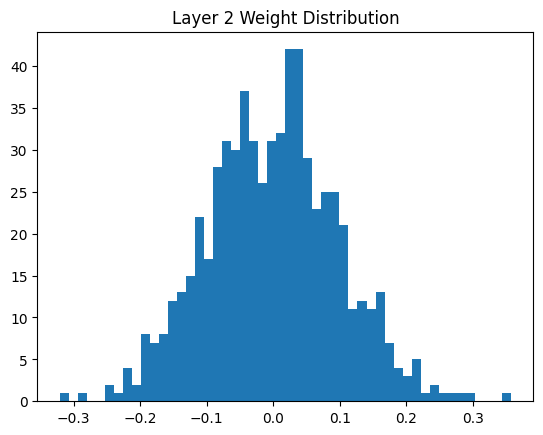

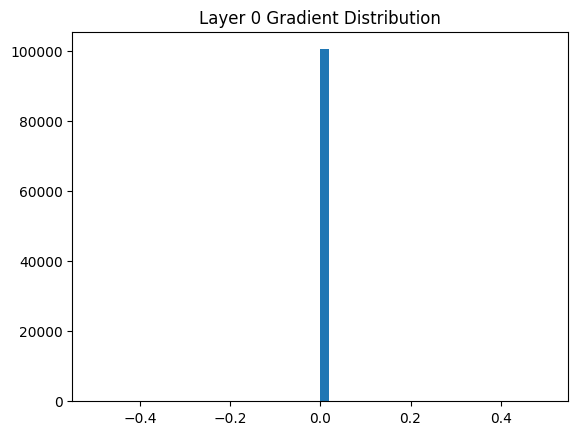

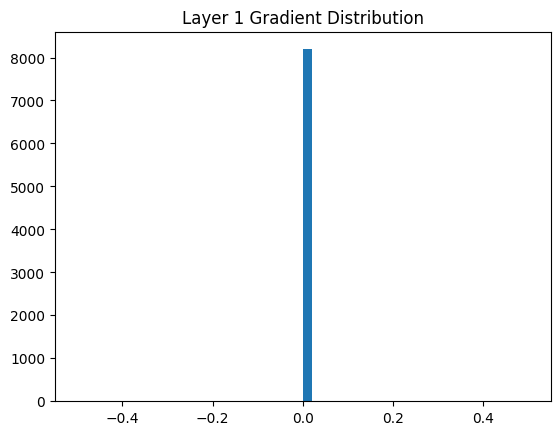

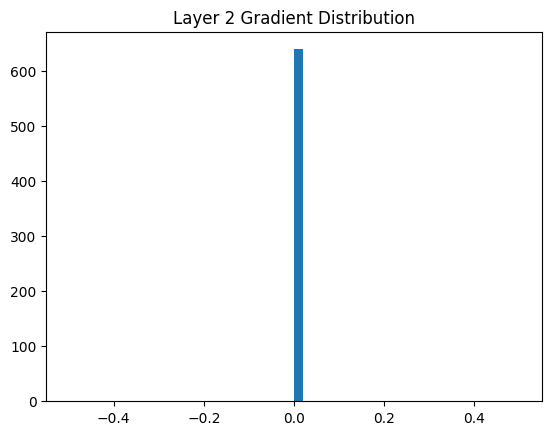

Epoch 1/20 - Train Loss: 1.9259 - Val Loss: 1.9453
Epoch 2/20 - Train Loss: 1.5400 - Val Loss: 1.5844
Epoch 3/20 - Train Loss: 1.2646 - Val Loss: 1.3306
Epoch 4/20 - Train Loss: 1.0750 - Val Loss: 1.1516
Epoch 5/20 - Train Loss: 0.9364 - Val Loss: 1.0251
Epoch 6/20 - Train Loss: 0.8343 - Val Loss: 0.9358
Epoch 7/20 - Train Loss: 0.7532 - Val Loss: 0.8636
Epoch 8/20 - Train Loss: 0.6900 - Val Loss: 0.8067
Epoch 9/20 - Train Loss: 0.6339 - Val Loss: 0.7639
Epoch 10/20 - Train Loss: 0.5882 - Val Loss: 0.7214
Epoch 11/20 - Train Loss: 0.5506 - Val Loss: 0.6947
Epoch 12/20 - Train Loss: 0.5165 - Val Loss: 0.6622
Epoch 13/20 - Train Loss: 0.4883 - Val Loss: 0.6373
Epoch 14/20 - Train Loss: 0.4626 - Val Loss: 0.6230
Epoch 15/20 - Train Loss: 0.4403 - Val Loss: 0.6034
Epoch 16/20 - Train Loss: 0.4208 - Val Loss: 0.5849
Epoch 17/20 - Train Loss: 0.4020 - Val Loss: 0.5745
Epoch 18/20 - Train Loss: 0.3863 - Val Loss: 0.5612
Epoch 19/20 - Train Loss: 0.3722 - Val Loss: 0.5534
Epoch 20/20 - Train L

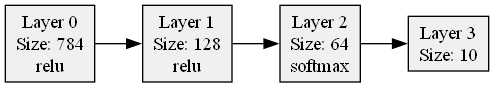

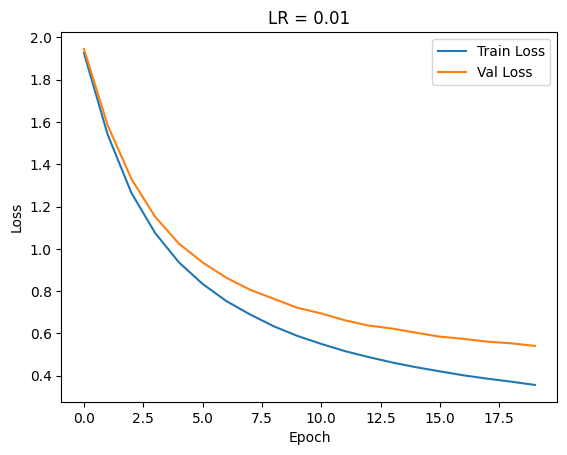

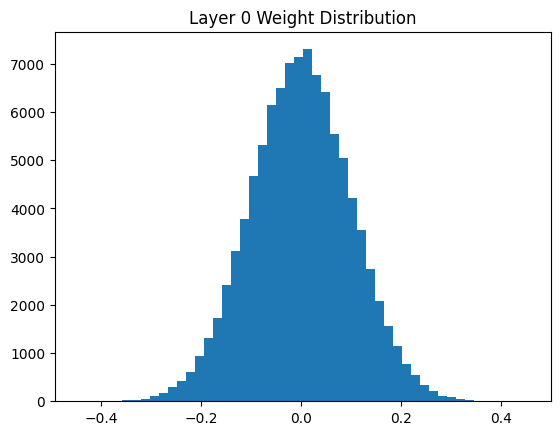

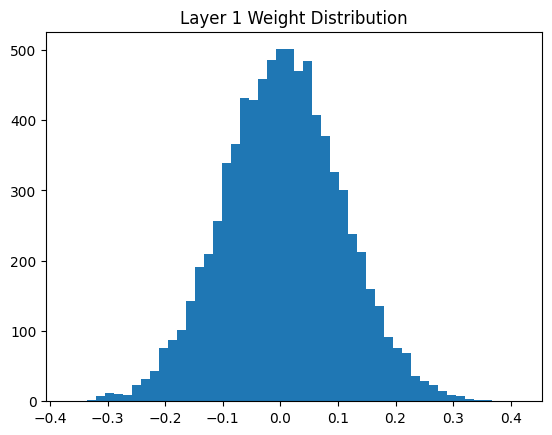

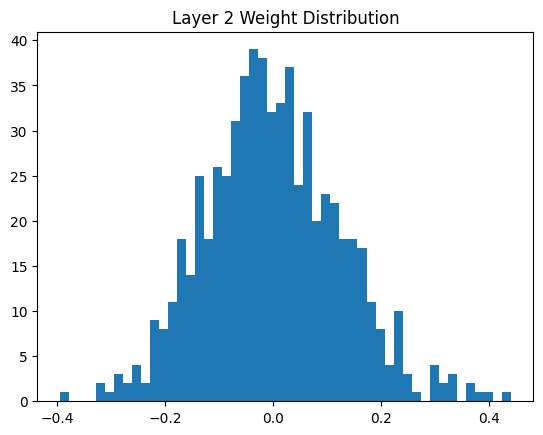

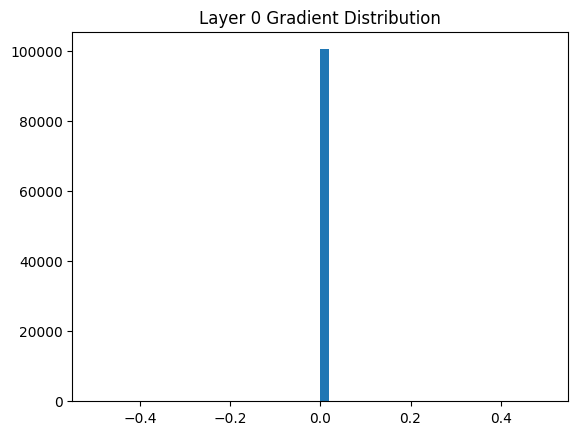

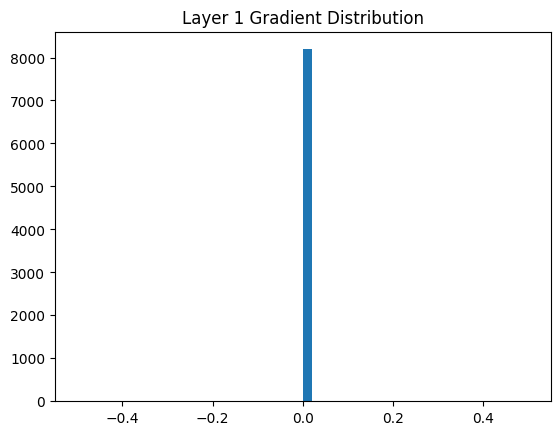

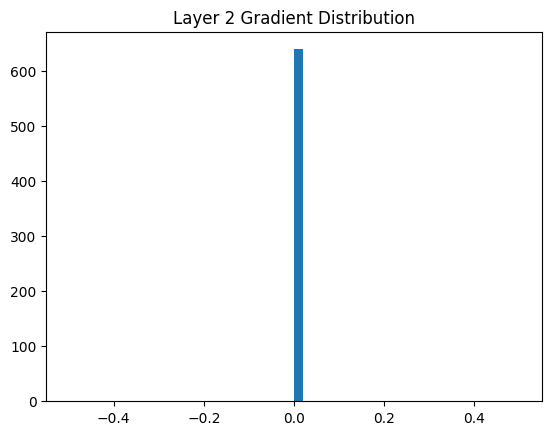

Epoch 1/20 - Train Loss: 0.6945 - Val Loss: 0.8099
Epoch 2/20 - Train Loss: 0.5104 - Val Loss: 0.6714
Epoch 3/20 - Train Loss: 0.2932 - Val Loss: 0.4819
Epoch 4/20 - Train Loss: 0.2599 - Val Loss: 0.5029
Epoch 5/20 - Train Loss: 0.1967 - Val Loss: 0.4285
Epoch 6/20 - Train Loss: 0.1394 - Val Loss: 0.4059
Epoch 7/20 - Train Loss: 0.1546 - Val Loss: 0.4546
Epoch 8/20 - Train Loss: 0.1294 - Val Loss: 0.3909
Epoch 9/20 - Train Loss: 0.1407 - Val Loss: 0.5387
Epoch 10/20 - Train Loss: 0.0788 - Val Loss: 0.4262
Epoch 11/20 - Train Loss: 0.0698 - Val Loss: 0.4503
Epoch 12/20 - Train Loss: 0.0568 - Val Loss: 0.4161
Epoch 13/20 - Train Loss: 0.0408 - Val Loss: 0.3967
Epoch 14/20 - Train Loss: 0.0378 - Val Loss: 0.4094
Epoch 15/20 - Train Loss: 0.0302 - Val Loss: 0.4004
Epoch 16/20 - Train Loss: 0.0344 - Val Loss: 0.4257
Epoch 17/20 - Train Loss: 0.0234 - Val Loss: 0.4051
Epoch 18/20 - Train Loss: 0.0220 - Val Loss: 0.4179
Epoch 19/20 - Train Loss: 0.0191 - Val Loss: 0.4081
Epoch 20/20 - Train L

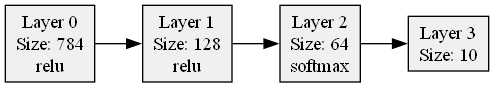

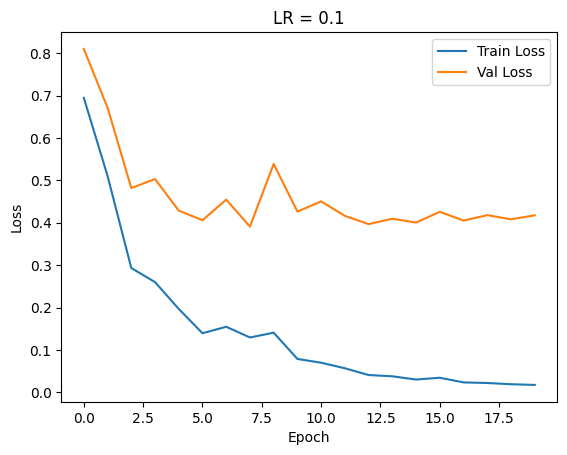

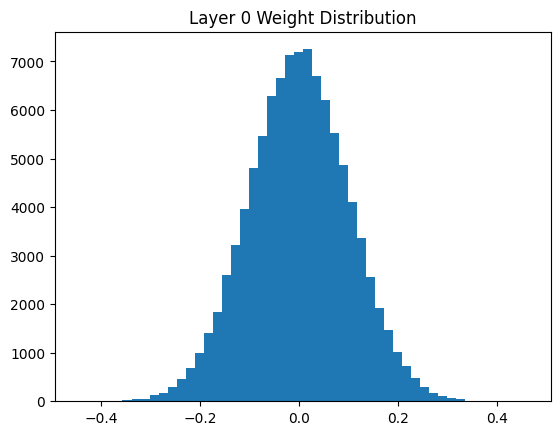

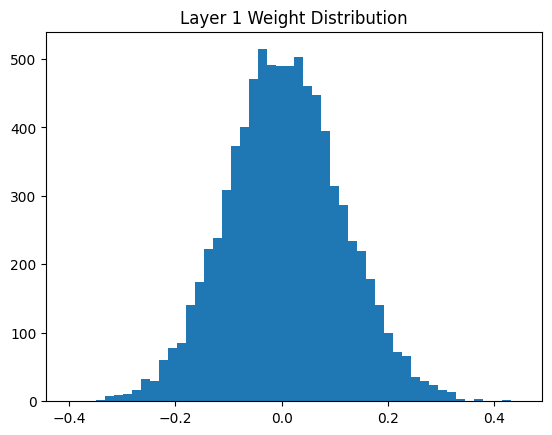

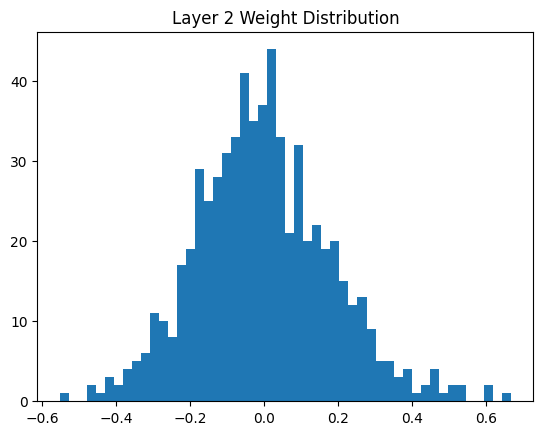

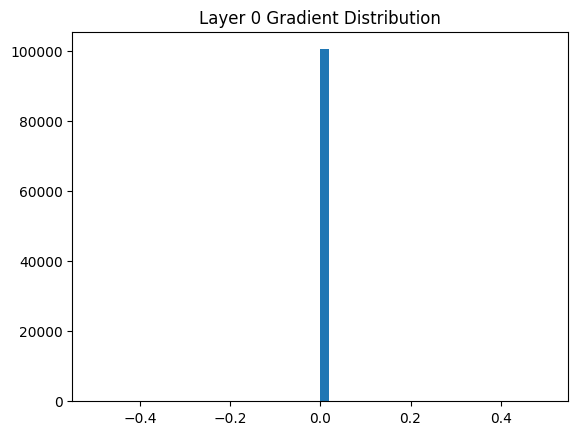

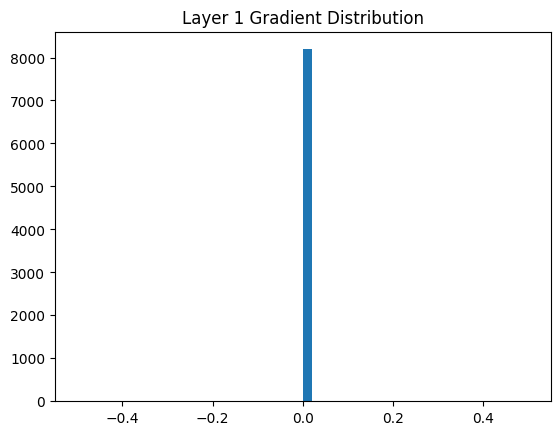

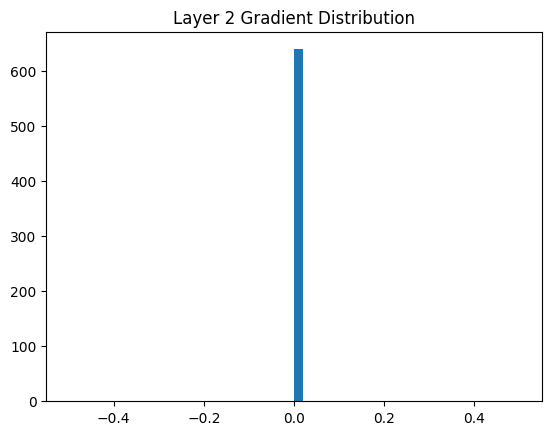


================= Hasil Perbandingan =================
TC 1 Accuracy: 52.94% | Waktu: 3.66s
TC 2 Accuracy: 85.77% | Waktu: 3.27s
TC 3 Accuracy: 90.64% | Waktu: 3.59s


In [21]:
## Variasi activation FFNN

# 1. Learning Rate = 0.001
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.001,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.001')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0


# 2. Learning Rate = 0.01
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.01')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc2_accuracy = np.mean(test_pred_classes == y_test_int)
tc2_time = time.time() - t0


# 3. Learning Rate = 0.1
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.1,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.1')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc3_accuracy = np.mean(test_pred_classes == y_test_int)
tc3_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"TC 1 Accuracy: {tc1_accuracy * 100:.2f}% | Waktu: {tc1_time:.2f}s")
print(f"TC 2 Accuracy: {tc2_accuracy * 100:.2f}% | Waktu: {tc2_time:.2f}s")
print(f"TC 3 Accuracy: {tc3_accuracy * 100:.2f}% | Waktu: {tc3_time:.2f}s")
print("=======================================================")

## Weight Initialization Variation

Epoch 1/20 - Train Loss: 2.3024 - Val Loss: 2.3025
Epoch 2/20 - Train Loss: 2.3023 - Val Loss: 2.3023
Epoch 3/20 - Train Loss: 2.3021 - Val Loss: 2.3022
Epoch 4/20 - Train Loss: 2.3019 - Val Loss: 2.3021
Epoch 5/20 - Train Loss: 2.3018 - Val Loss: 2.3021
Epoch 6/20 - Train Loss: 2.3017 - Val Loss: 2.3020
Epoch 7/20 - Train Loss: 2.3015 - Val Loss: 2.3019
Epoch 8/20 - Train Loss: 2.3014 - Val Loss: 2.3018
Epoch 9/20 - Train Loss: 2.3013 - Val Loss: 2.3018
Epoch 10/20 - Train Loss: 2.3012 - Val Loss: 2.3018
Epoch 11/20 - Train Loss: 2.3011 - Val Loss: 2.3017
Epoch 12/20 - Train Loss: 2.3010 - Val Loss: 2.3017
Epoch 13/20 - Train Loss: 2.3010 - Val Loss: 2.3017
Epoch 14/20 - Train Loss: 2.3009 - Val Loss: 2.3016
Epoch 15/20 - Train Loss: 2.3008 - Val Loss: 2.3016
Epoch 16/20 - Train Loss: 2.3008 - Val Loss: 2.3016
Epoch 17/20 - Train Loss: 2.3007 - Val Loss: 2.3016
Epoch 18/20 - Train Loss: 2.3007 - Val Loss: 2.3015
Epoch 19/20 - Train Loss: 2.3006 - Val Loss: 2.3015
Epoch 20/20 - Train L

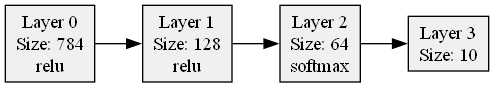

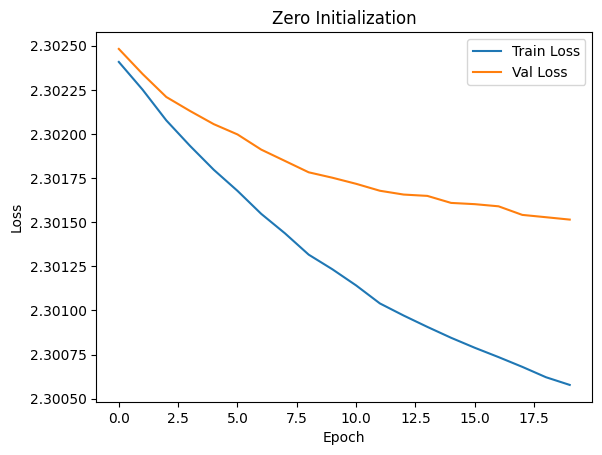

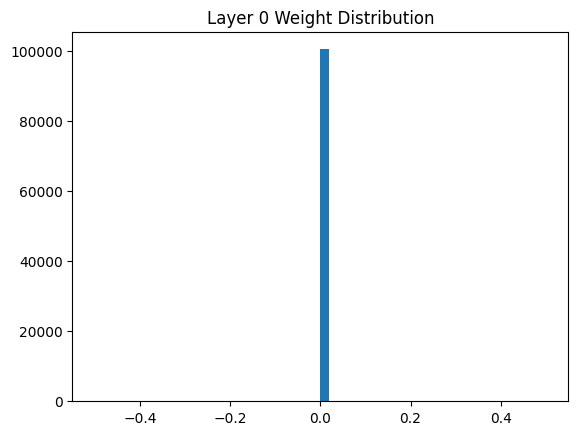

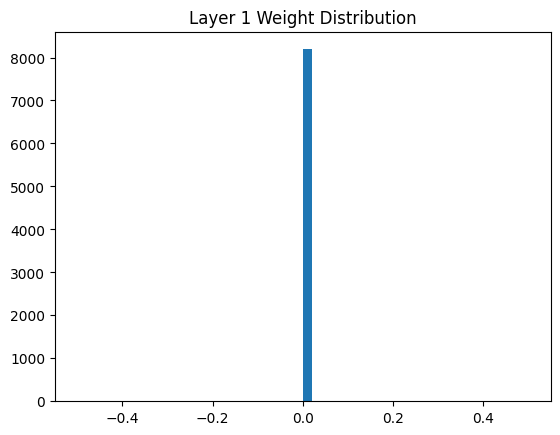

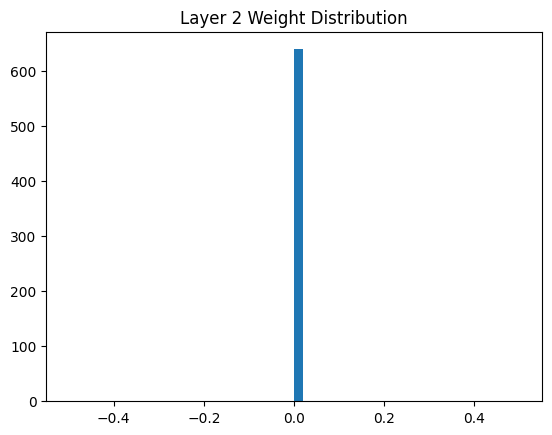

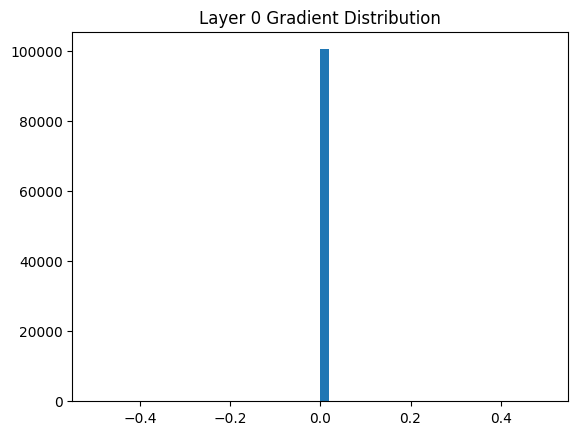

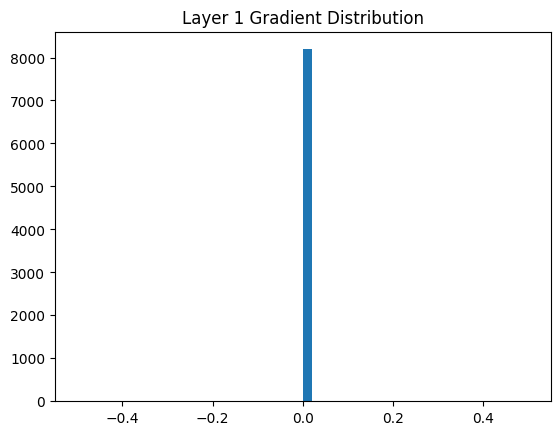

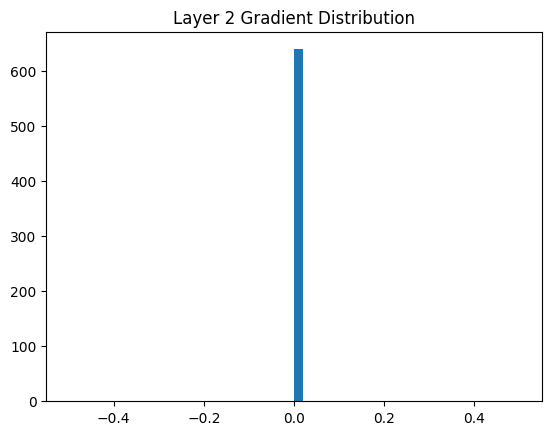

Epoch 1/20 - Train Loss: 12.2633 - Val Loss: 14.0940
Epoch 2/20 - Train Loss: 8.0045 - Val Loss: 9.5371
Epoch 3/20 - Train Loss: 5.8671 - Val Loss: 8.6698
Epoch 4/20 - Train Loss: 4.2928 - Val Loss: 7.0253
Epoch 5/20 - Train Loss: 3.9577 - Val Loss: 7.3258
Epoch 6/20 - Train Loss: 3.5272 - Val Loss: 6.8993
Epoch 7/20 - Train Loss: 3.1186 - Val Loss: 6.7571
Epoch 8/20 - Train Loss: 2.8110 - Val Loss: 6.2145
Epoch 9/20 - Train Loss: 2.5069 - Val Loss: 6.3502
Epoch 10/20 - Train Loss: 2.4423 - Val Loss: 6.2783
Epoch 11/20 - Train Loss: 1.5154 - Val Loss: 6.0526
Epoch 12/20 - Train Loss: 1.5380 - Val Loss: 5.9909
Epoch 13/20 - Train Loss: 1.0239 - Val Loss: 5.5765
Epoch 14/20 - Train Loss: 1.0931 - Val Loss: 5.7458
Epoch 15/20 - Train Loss: 1.3869 - Val Loss: 5.5123
Epoch 16/20 - Train Loss: 1.1298 - Val Loss: 5.9407
Epoch 17/20 - Train Loss: 0.6665 - Val Loss: 5.3755
Epoch 18/20 - Train Loss: 1.4499 - Val Loss: 6.1029
Epoch 19/20 - Train Loss: 0.6347 - Val Loss: 5.4825
Epoch 20/20 - Train

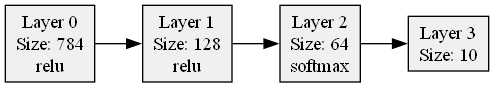

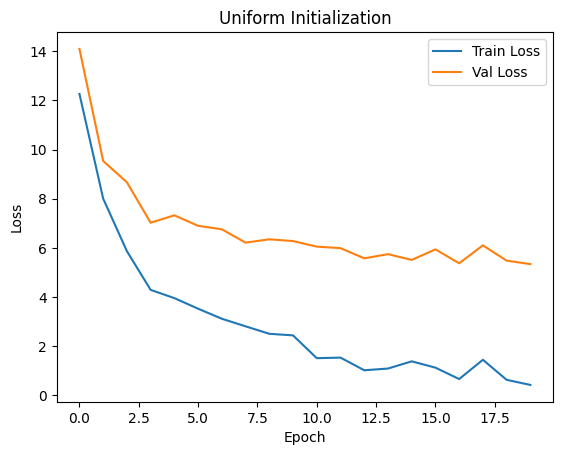

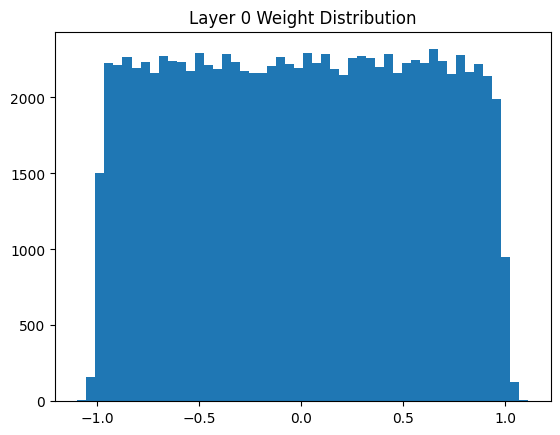

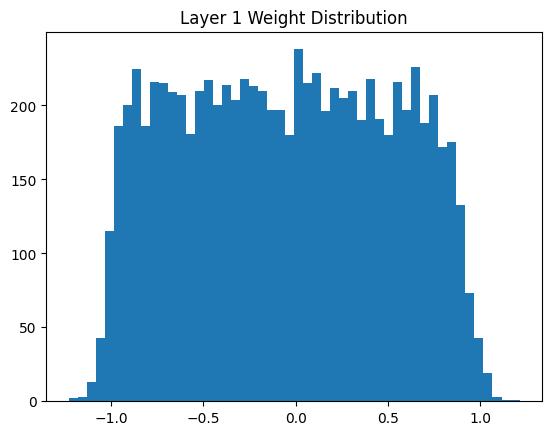

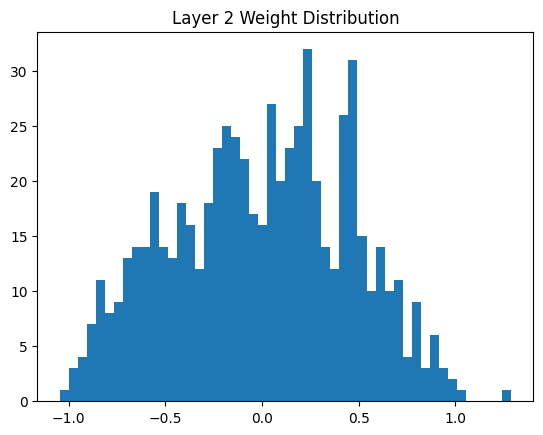

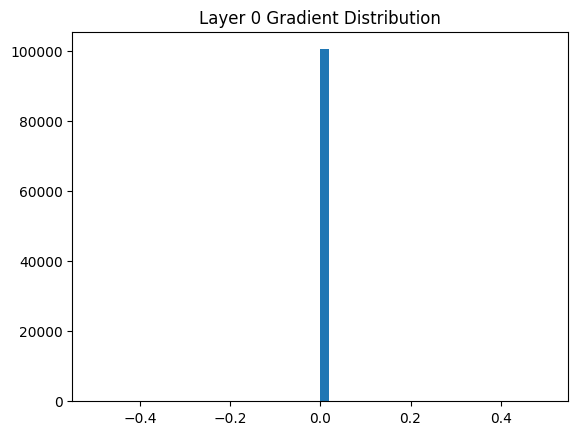

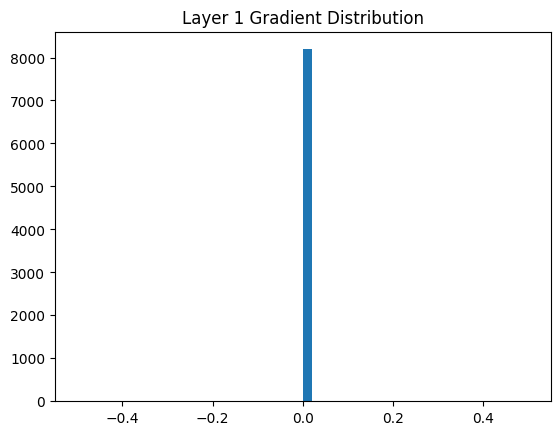

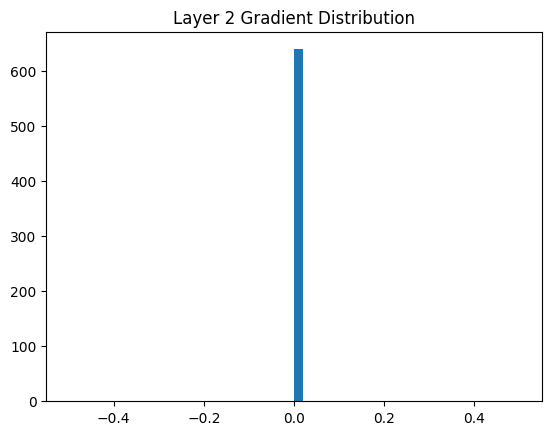

Epoch 1/20 - Train Loss: 1.9259 - Val Loss: 1.9453
Epoch 2/20 - Train Loss: 1.5400 - Val Loss: 1.5844
Epoch 3/20 - Train Loss: 1.2646 - Val Loss: 1.3306
Epoch 4/20 - Train Loss: 1.0750 - Val Loss: 1.1516
Epoch 5/20 - Train Loss: 0.9364 - Val Loss: 1.0251
Epoch 6/20 - Train Loss: 0.8343 - Val Loss: 0.9358
Epoch 7/20 - Train Loss: 0.7532 - Val Loss: 0.8636
Epoch 8/20 - Train Loss: 0.6900 - Val Loss: 0.8067
Epoch 9/20 - Train Loss: 0.6339 - Val Loss: 0.7639
Epoch 10/20 - Train Loss: 0.5882 - Val Loss: 0.7214
Epoch 11/20 - Train Loss: 0.5506 - Val Loss: 0.6947
Epoch 12/20 - Train Loss: 0.5165 - Val Loss: 0.6622
Epoch 13/20 - Train Loss: 0.4883 - Val Loss: 0.6373
Epoch 14/20 - Train Loss: 0.4626 - Val Loss: 0.6230
Epoch 15/20 - Train Loss: 0.4403 - Val Loss: 0.6034
Epoch 16/20 - Train Loss: 0.4208 - Val Loss: 0.5849
Epoch 17/20 - Train Loss: 0.4020 - Val Loss: 0.5745
Epoch 18/20 - Train Loss: 0.3863 - Val Loss: 0.5612
Epoch 19/20 - Train Loss: 0.3722 - Val Loss: 0.5534
Epoch 20/20 - Train L

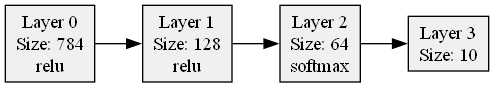

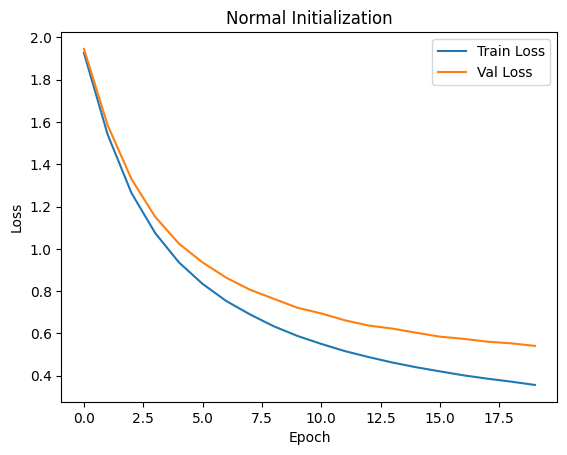

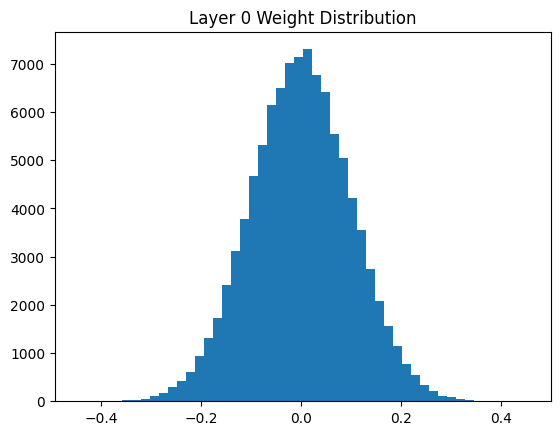

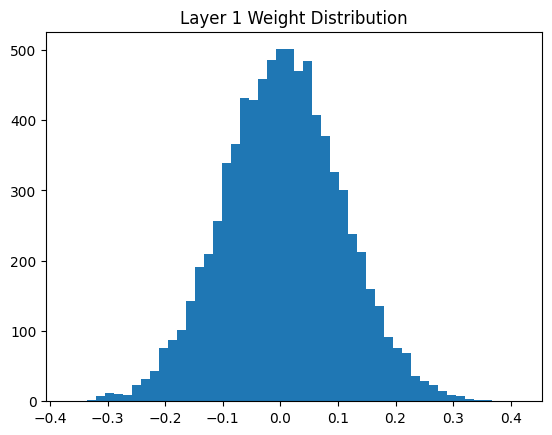

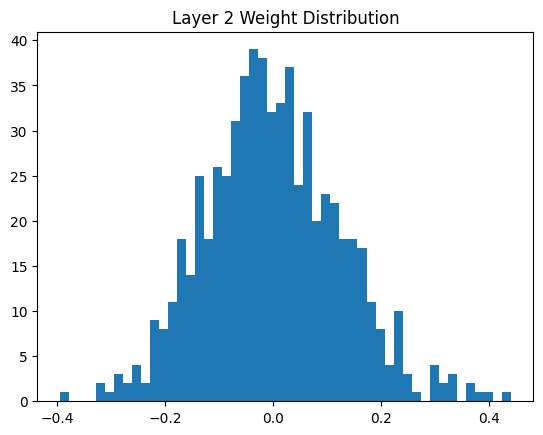

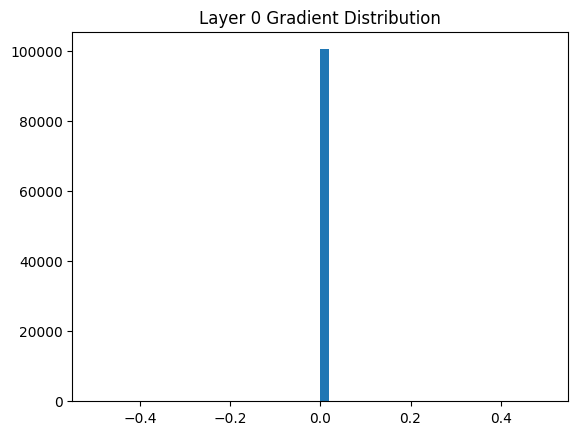

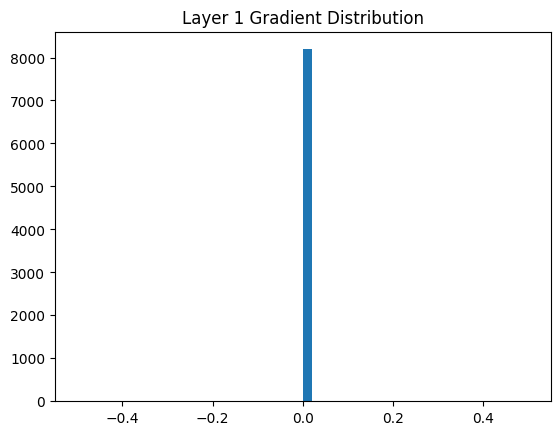

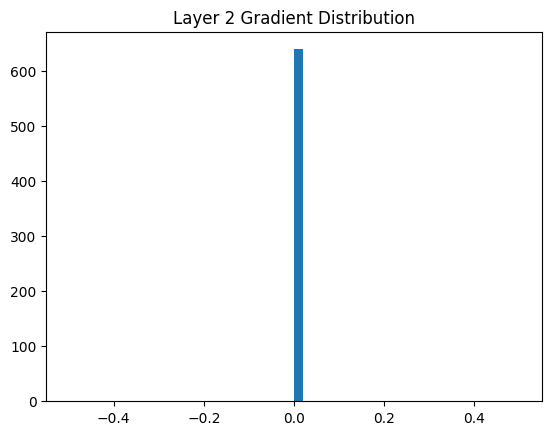


================= Hasil Perbandingan =================
Zero Initialization Accuracy: 11.10% | Waktu: 3.81s
Uniform Initialization Accuracy: 74.51% | Waktu: 5.46s
Normal Initialization Accuracy: 85.77% | Waktu: 3.82s


In [22]:
## Variasi weight initialization
# 1. Zero initialization
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'zero'},
    {'method': 'zero'},
    {'method': 'zero'}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Zero Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
zero_accuracy = np.mean(test_pred_classes == y_test_int)
zero_time = time.time() - t0

# 2. Uniform
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42},
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42},
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Uniform Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
uniform_accuracy = np.mean(test_pred_classes == y_test_int)
uniform_time = time.time() - t0

# 3. Normal
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Normal Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
normal_accuracy = np.mean(test_pred_classes == y_test_int)
normal_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"Zero Initialization Accuracy: {zero_accuracy * 100:.2f}% | Waktu: {zero_time:.2f}s")
print(f"Uniform Initialization Accuracy: {uniform_accuracy * 100:.2f}% | Waktu: {uniform_time:.2f}s")
print(f"Normal Initialization Accuracy: {normal_accuracy * 100:.2f}% | Waktu: {normal_time:.2f}s")
print("=======================================================")

## Compare with sklearn

Epoch 1/20 - Train Loss: 1.9259 - Val Loss: 1.9453
Epoch 2/20 - Train Loss: 1.5400 - Val Loss: 1.5844
Epoch 3/20 - Train Loss: 1.2646 - Val Loss: 1.3306
Epoch 4/20 - Train Loss: 1.0750 - Val Loss: 1.1516
Epoch 5/20 - Train Loss: 0.9364 - Val Loss: 1.0251
Epoch 6/20 - Train Loss: 0.8343 - Val Loss: 0.9358
Epoch 7/20 - Train Loss: 0.7532 - Val Loss: 0.8636
Epoch 8/20 - Train Loss: 0.6900 - Val Loss: 0.8067
Epoch 9/20 - Train Loss: 0.6339 - Val Loss: 0.7639
Epoch 10/20 - Train Loss: 0.5882 - Val Loss: 0.7214
Epoch 11/20 - Train Loss: 0.5506 - Val Loss: 0.6947
Epoch 12/20 - Train Loss: 0.5165 - Val Loss: 0.6622
Epoch 13/20 - Train Loss: 0.4883 - Val Loss: 0.6373
Epoch 14/20 - Train Loss: 0.4626 - Val Loss: 0.6230
Epoch 15/20 - Train Loss: 0.4403 - Val Loss: 0.6034
Epoch 16/20 - Train Loss: 0.4208 - Val Loss: 0.5849
Epoch 17/20 - Train Loss: 0.4020 - Val Loss: 0.5745
Epoch 18/20 - Train Loss: 0.3863 - Val Loss: 0.5612
Epoch 19/20 - Train Loss: 0.3722 - Val Loss: 0.5534
Epoch 20/20 - Train L

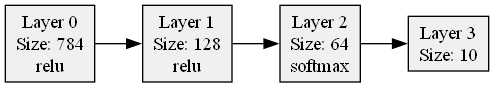

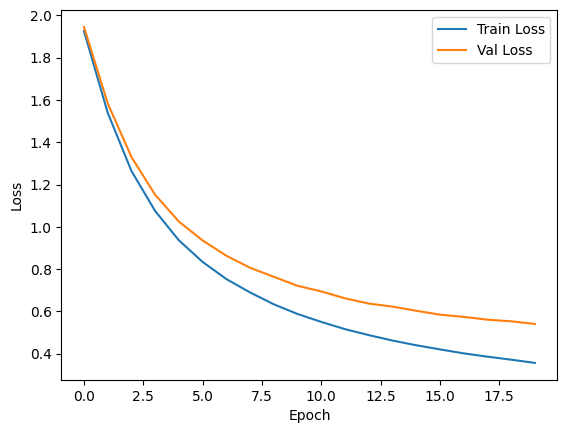

Iteration 1, loss = 1.06592763
Iteration 2, loss = 0.31439900
Iteration 3, loss = 0.18871989
Iteration 4, loss = 0.12432202
Iteration 5, loss = 0.08764257
Iteration 6, loss = 0.06080016
Iteration 7, loss = 0.04212907
Iteration 8, loss = 0.03027202
Iteration 9, loss = 0.02159231
Iteration 10, loss = 0.01627967
Iteration 11, loss = 0.01239411
Iteration 12, loss = 0.00986558
Iteration 13, loss = 0.00775005
Iteration 14, loss = 0.00643460
Iteration 15, loss = 0.00529559
Iteration 16, loss = 0.00459183
Iteration 17, loss = 0.00400024
Iteration 18, loss = 0.00348188
Iteration 19, loss = 0.00321357
Iteration 20, loss = 0.00275358


c:\Users\Jimly\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


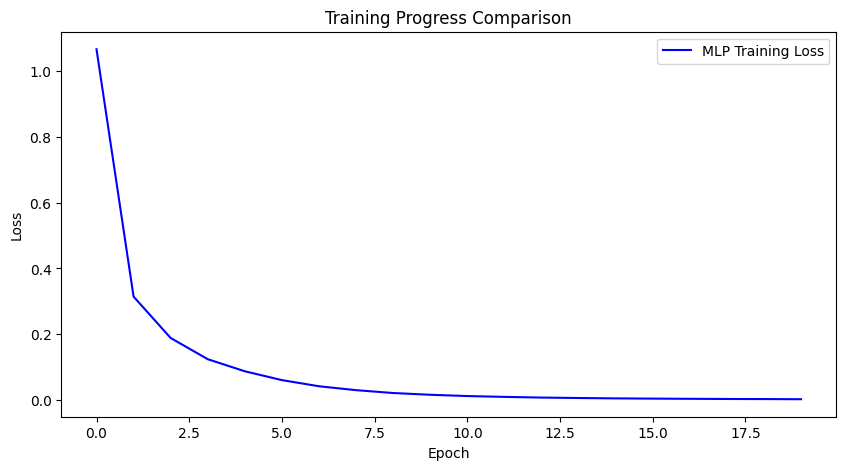

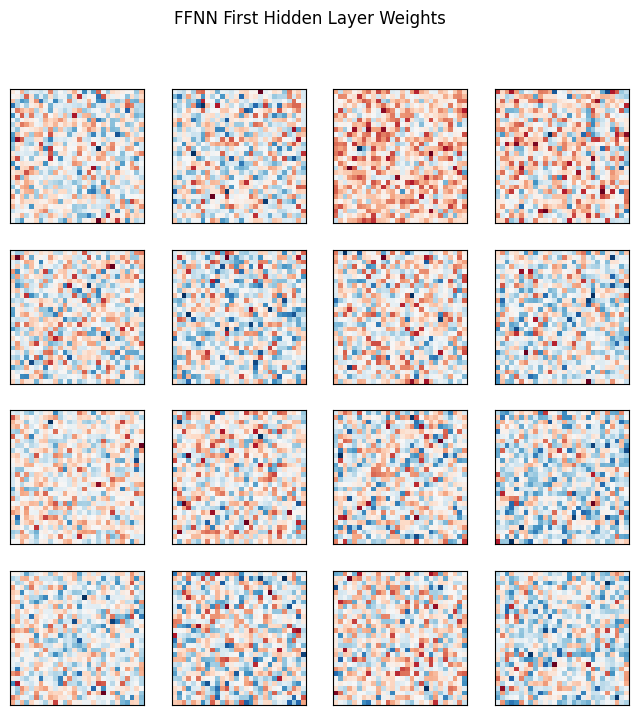


================= Hasil Perbandingan =================
FFNN Test Accuracy: 0.00% | Waktu: 3.16s
MLP Test Accuracy: 92.97% | Waktu: 2.86s


In [23]:

# 3. Implementasi FFNN Kustom
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

# 4. Implementasi MLPClassifier
# ==============================
t0 = time.time()
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=128,
    max_iter=20,
    verbose=True,
    random_state=42
)

mlp_clf.fit(X_train, y_train)
mlp_accuracy = mlp_clf.score(X_test, y_test)
mlp_time = time.time() - t0

# 5. Plotting dan Hasil
# ==============================
# Plot akurasi
plt.figure(figsize=(10, 5))
if hasattr(mlp_clf, 'loss_curve_'):
    plt.plot(mlp_clf.loss_curve_, label='MLP Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress Comparison')
plt.legend()
plt.show()

# Plot bobot layer pertama
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    if i < ffnn_model.layers[0].W.shape[1]:
        ax.imshow(ffnn_model.layers[0].W[:, i].reshape(28, 28), cmap='RdBu_r')
        ax.set_xticks(())
        ax.set_yticks(())
plt.suptitle("FFNN First Hidden Layer Weights")
plt.show()

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"FFNN Test Accuracy: {ffnn_accuracy * 100:.2f}% | Waktu: {ffnn_time:.2f}s")
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}% | Waktu: {mlp_time:.2f}s")
print("=======================================================")

Epoch 1/20 - Train Loss: 1.8736 - Val Loss: 1.9039
Epoch 2/20 - Train Loss: 1.4837 - Val Loss: 1.5374
Epoch 3/20 - Train Loss: 1.1718 - Val Loss: 1.2316
Epoch 4/20 - Train Loss: 0.9602 - Val Loss: 1.0478
Epoch 5/20 - Train Loss: 0.8253 - Val Loss: 0.9340
Epoch 6/20 - Train Loss: 0.7390 - Val Loss: 0.8678
Epoch 7/20 - Train Loss: 0.6499 - Val Loss: 0.8078
Epoch 8/20 - Train Loss: 0.5840 - Val Loss: 0.7493
Epoch 9/20 - Train Loss: 0.5209 - Val Loss: 0.7100
Epoch 10/20 - Train Loss: 0.4805 - Val Loss: 0.6707
Epoch 11/20 - Train Loss: 0.4490 - Val Loss: 0.6579
Epoch 12/20 - Train Loss: 0.4079 - Val Loss: 0.6267
Epoch 13/20 - Train Loss: 0.4060 - Val Loss: 0.6505
Epoch 14/20 - Train Loss: 0.3622 - Val Loss: 0.5964
Epoch 15/20 - Train Loss: 0.3395 - Val Loss: 0.5942
Epoch 16/20 - Train Loss: 0.3234 - Val Loss: 0.5784
Epoch 17/20 - Train Loss: 0.3059 - Val Loss: 0.5699
Epoch 18/20 - Train Loss: 0.2948 - Val Loss: 0.5530
Epoch 19/20 - Train Loss: 0.2773 - Val Loss: 0.5576
Epoch 20/20 - Train L

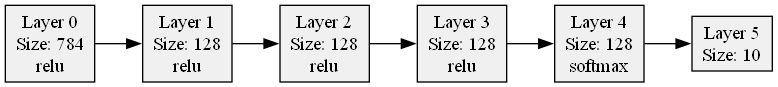

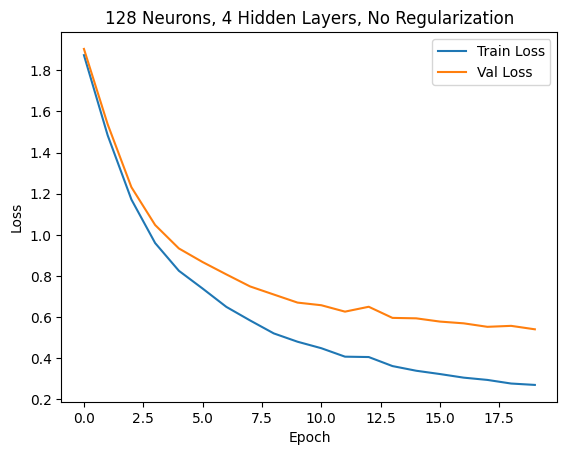

Epoch 1/20 - Train Loss: 1.9007 - Val Loss: 2.1449
Epoch 2/20 - Train Loss: 1.5115 - Val Loss: 1.7790
Epoch 3/20 - Train Loss: 1.2000 - Val Loss: 1.4736
Epoch 4/20 - Train Loss: 0.9884 - Val Loss: 1.2896
Epoch 5/20 - Train Loss: 0.8535 - Val Loss: 1.1754
Epoch 6/20 - Train Loss: 0.7669 - Val Loss: 1.1089
Epoch 7/20 - Train Loss: 0.6779 - Val Loss: 1.0488
Epoch 8/20 - Train Loss: 0.6120 - Val Loss: 0.9901
Epoch 9/20 - Train Loss: 0.5490 - Val Loss: 0.9506
Epoch 10/20 - Train Loss: 0.5086 - Val Loss: 0.9113
Epoch 11/20 - Train Loss: 0.4771 - Val Loss: 0.8978
Epoch 12/20 - Train Loss: 0.4360 - Val Loss: 0.8667
Epoch 13/20 - Train Loss: 0.4345 - Val Loss: 0.8903
Epoch 14/20 - Train Loss: 0.3902 - Val Loss: 0.8355
Epoch 15/20 - Train Loss: 0.3677 - Val Loss: 0.8329
Epoch 16/20 - Train Loss: 0.3517 - Val Loss: 0.8166
Epoch 17/20 - Train Loss: 0.3341 - Val Loss: 0.8079
Epoch 18/20 - Train Loss: 0.3232 - Val Loss: 0.7908
Epoch 19/20 - Train Loss: 0.3059 - Val Loss: 0.7952
Epoch 20/20 - Train L

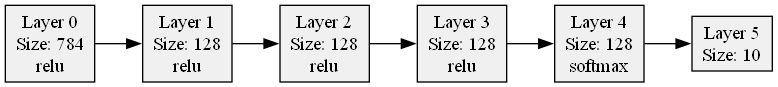

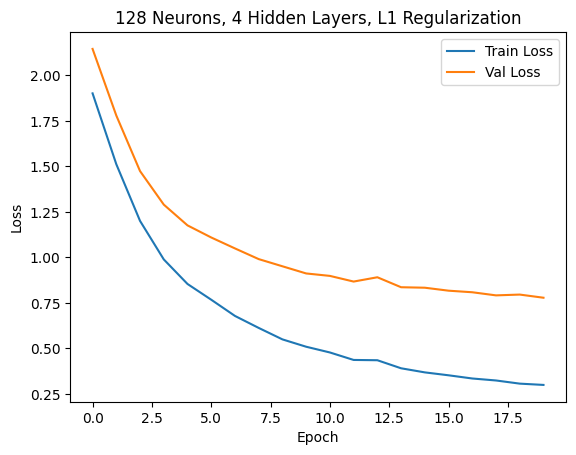

Epoch 1/20 - Train Loss: 1.8753 - Val Loss: 1.9190
Epoch 2/20 - Train Loss: 1.4855 - Val Loss: 1.5527
Epoch 3/20 - Train Loss: 1.1737 - Val Loss: 1.2470
Epoch 4/20 - Train Loss: 0.9620 - Val Loss: 1.0629
Epoch 5/20 - Train Loss: 0.8272 - Val Loss: 0.9492
Epoch 6/20 - Train Loss: 0.7408 - Val Loss: 0.8829
Epoch 7/20 - Train Loss: 0.6518 - Val Loss: 0.8230
Epoch 8/20 - Train Loss: 0.5859 - Val Loss: 0.7645
Epoch 9/20 - Train Loss: 0.5229 - Val Loss: 0.7252
Epoch 10/20 - Train Loss: 0.4825 - Val Loss: 0.6859
Epoch 11/20 - Train Loss: 0.4509 - Val Loss: 0.6731
Epoch 12/20 - Train Loss: 0.4098 - Val Loss: 0.6420
Epoch 13/20 - Train Loss: 0.4080 - Val Loss: 0.6657
Epoch 14/20 - Train Loss: 0.3640 - Val Loss: 0.6115
Epoch 15/20 - Train Loss: 0.3413 - Val Loss: 0.6091
Epoch 16/20 - Train Loss: 0.3254 - Val Loss: 0.5934
Epoch 17/20 - Train Loss: 0.3077 - Val Loss: 0.5847
Epoch 18/20 - Train Loss: 0.2968 - Val Loss: 0.5679
Epoch 19/20 - Train Loss: 0.2792 - Val Loss: 0.5726
Epoch 20/20 - Train L

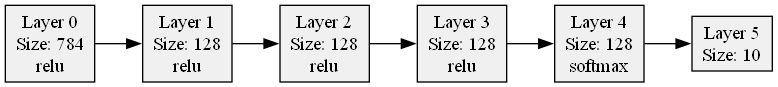

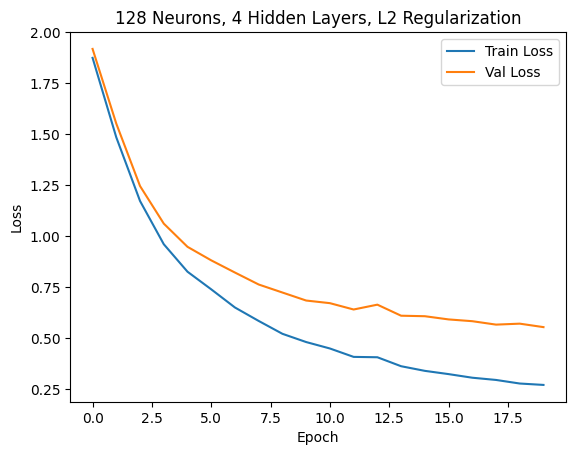

In [24]:
# # Without regularization
# model = FFNN(layer_sizes, activations, "categorical_cross_entropy", weight_inits)

# # With L2 regularization
# model_l2 = FFNN(layer_sizes, activations, categorical_cross_entropy, weight_inits, 
#                 regularization='l2', lambda_reg=0.01)

# # With L1 regularization
# model_l1 = FFNN(layer_sizes, activations, categorical_cross_entropy, weight_inits, 
#                 regularization='l1', lambda_reg=0.01)

layer_sizes = [784, 128, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

## Variasi regulatisasi FFNN
# No regularization
# ================================================================================================
t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers, No Regularization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0





## Variasi regulatisasi FFNN
# L1 regularization
# ================================================================================================
t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits,
    regularization='l1', lambda_reg=0.01
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers, L1 Regularization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0







## Variasi regulatisasi FFNN
# L2 regularization
# ================================================================================================
t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits,
    regularization='l2', lambda_reg=0.01
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers, L2 Regularization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0

